# Analise exploratória.
### Introdução.
Este Jupyter Notebook investiga a base de dados de  propriedades acústicas disponíveis no site  http://www.primaryobjects.com/2016/06/22/identifying-the-gender-of-a-voice-using-machine-learning/   
Objetivo da investigação é determinar as chances de algum algoritmo para detecção de gênero, seja por estatística tradicional ou por meio técnicas machine learning e redes neurais, possibilitando a implantação em dispositivos embarcados de baixo custo de memória e processamento restrito. 

# Propriedades acústicas medidas

As seguintes propriedades acústicas de cada voz são medidas:

- **meanfreq**  : frequência média (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **sd**  : desvio padrão da frequência, sobre as amostras compostas no sinal de arquivo de voz;
- **mediana**  : frequência mediana (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **Q25**  : primeiro quantil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **Q75**  : terceiro quantil (em kHz) sobre as amostras compostas no sinal de arquivo de voz;
- **IQR**  : intervalo interquartil (em kHz)sobre as amostras compostas no sinal de arquivo de voz;
- **skew**  : média de assimetria da distribuição das frequências de vocal perdominante;
- **kurt**  : curtose distribuição espectral da voz, domínio da frequência;
- **sp.ent**  : entropia espectral, pureza da distribuição da voz em relação ao nível de ruído; 
- **sfm**  : nivelamento espectral,  estima a planaridade de um espectro de frequência;
- **modo**  : frequência de modo, ou seja, frequência dominante da voz;
- **centrod**  : frequência central máxima visto no domínio da frequência;
- **meanfun**  : média da frequência fundamental medida através do sinal acústico (Tonalidade base da voz);
- **minfun**  : frequência fundamental mínima medida no sinal acústico  (Tonalidade base da voz);
- **maxfun**  : frequência fundamental máxima medida através do sinal acústico (Tonalidade base da voz);
- **meandom**  : média da frequência dominante medida através do sinal acústico  (média total das notas  musicais mais graves da voz em relação ao sinal gravado);
- **mindom**  : mínimo de frequência dominante medido através do sinal acústico;
- **maxdom**  : máxima da frequência dominante medida através do sinal acústico;
- **dfrange**  : faixa de frequência dominante medida através do sinal acústico;
- **modindx**  : índice de modulação. Calculado como a diferença absoluta acumulada entre medições adjacentes de frequências fundamentais divididas pela faixa de frequência.
- **label**  : rotulo de identificador da amostra em relação ao sexo, adicionado durante a gravação "male" ou "female".




# Analise em python da base de propriedades acústicas.

In [1]:
%matplotlib inline

In [2]:
# Importa as bibliotecas
import pandas
import matplotlib.pyplot as plt
import numpy 
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb

In [3]:
# Carrega os dados
url = ".\\baseDados\\voice.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas, sep = ",")

In [4]:
# PANDAS: Verificando alguns dados
exemplos = dataset.head(2)
print(exemplos)



   meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   

         kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0  274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1  634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  

[2 rows x 21 columns]


In [5]:
dataset.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [6]:
dataset.tail()
exemplos = dataset.tail(2)
print(exemplos)


      meanfreq        sd    median       Q25       Q75       IQR      skew  \
3166  0.143659  0.090628  0.184976  0.043508  0.219943  0.176435  1.591065   
3167  0.165509  0.092884  0.183044  0.070072  0.250827  0.180756  1.705029   

          kurt    sp.ent       sfm   ...    centroid   meanfun    minfun  \
3166  5.388298  0.950436  0.675470   ...    0.143659  0.172375  0.034483   
3167  5.769115  0.938829  0.601529   ...    0.165509  0.185607  0.062257   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
3166  0.250000  0.791360  0.007812  3.593750  3.585938  0.311002  female  
3167  0.271186  0.227022  0.007812  0.554688  0.546875  0.350000  female  

[2 rows x 21 columns]


# Verifica valores nulos.

In [7]:
dfnull = dataset.isnull()

In [8]:
dfnull.head(3)

meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm  \
0     False  False   False  False  False  False  False  False   False  False   
1     False  False   False  False  False  False  False  False   False  False   
2     False  False   False  False  False  False  False  False   False  False   

   ...    centroid  meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  \
0  ...       False    False   False   False    False   False   False    False   
1  ...       False    False   False   False    False   False   False    False   
2  ...       False    False   False   False    False   False   False    False   

   modindx  label  
0    False  False  
1    False  False  
2    False  False  

[3 rows x 21 columns]

In [9]:
dfnull.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

## Gerando gráfico com valores nulos.

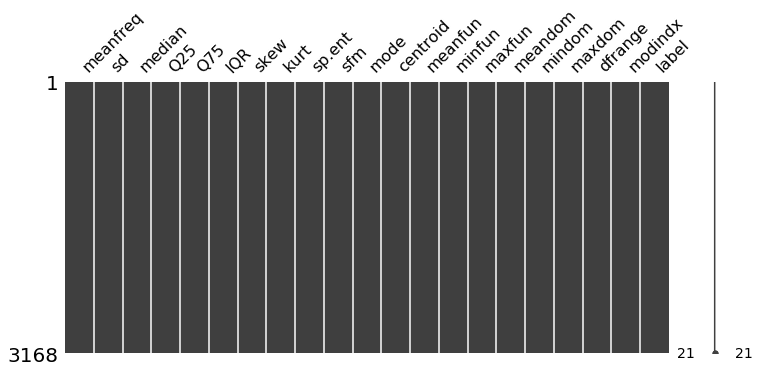

In [10]:
#!pip install missingno
#!pip3 install missingno


import missingno as msno
msno.matrix(dataset,figsize=(12,5))

## Compara a dimensão da tabela original com nova tabela onde foi removidos os elementos nulos.

In [11]:
dfnull.dropna()
print(dfnull.shape)

(3168, 21)


In [12]:
# PANDAS: Verifica a dimensão dos dados (linhas, colunas)
dim = dataset.shape
print(dim)

(3168, 21)


### Tabela sem elementos nulos tem  a mesma dimenssão da tabela original, portanto a base não possui valores nulos.

# Verifica os tipos de dados de cada atributo

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 507.4+ KB


## PANDAS: Verifica os tipos de dados de cada atributo.

In [14]:
tipos = dataset.dtypes
print(tipos)


meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object


# Estatística descritiva

In [15]:
dataset.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

## Pandas: Estatística descritiva

In [16]:

pandas.set_option('display.width', 100)
pandas.set_option('precision', 3)
resultado = dataset.describe()
print(resultado)

       meanfreq        sd    median        Q25       Q75       IQR      skew      kurt    sp.ent  \
count  3168.000  3168.000  3168.000  3.168e+03  3168.000  3168.000  3168.000  3168.000  3168.000   
mean      0.181     0.057     0.186  1.405e-01     0.225     0.084     3.140    36.568     0.895   
std       0.030     0.017     0.036  4.868e-02     0.024     0.043     4.241   134.929     0.045   
min       0.039     0.018     0.011  2.288e-04     0.043     0.015     0.142     2.068     0.739   
25%       0.164     0.042     0.170  1.111e-01     0.209     0.043     1.650     5.670     0.862   
50%       0.185     0.059     0.190  1.403e-01     0.226     0.094     2.197     8.318     0.902   
75%       0.199     0.067     0.211  1.759e-01     0.244     0.114     2.932    13.649     0.929   
max       0.251     0.115     0.261  2.473e-01     0.273     0.252    34.725  1309.613     0.982   

            sfm      mode  centroid   meanfun    minfun    maxfun   meandom    mindom    maxdom  \


In [17]:
dataset.describe().transpose()


count    mean      std        min    25%    50%     75%       max
meanfreq  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251
sd        3168.0   0.057    0.017  1.836e-02  0.042  0.059   0.067     0.115
median    3168.0   0.186    0.036  1.097e-02  0.170  0.190   0.211     0.261
Q25       3168.0   0.140    0.049  2.288e-04  0.111  0.140   0.176     0.247
Q75       3168.0   0.225    0.024  4.295e-02  0.209  0.226   0.244     0.273
IQR       3168.0   0.084    0.043  1.456e-02  0.043  0.094   0.114     0.252
skew      3168.0   3.140    4.241  1.417e-01  1.650  2.197   2.932    34.725
kurt      3168.0  36.568  134.929  2.068e+00  5.670  8.318  13.649  1309.613
sp.ent    3168.0   0.895    0.045  7.387e-01  0.862  0.902   0.929     0.982
sfm       3168.0   0.408    0.178  3.688e-02  0.258  0.396   0.534     0.843
mode      3168.0   0.165    0.077  0.000e+00  0.118  0.187   0.221     0.280
centroid  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251
meanfun   3168.0   0.143    0.032  5.557e-02  0.117  0.141   0.170     0.238
minfun    3168.0   0.037    0.019  9.775e-03  0.018  0.046   0.048     0.204
maxfun    3168.0   0.259    0.030  1.031e-01  0.254  0.271   0.277     0.279
meandom   3168.0   0.829    0.525  7.812e-03  0.420  0.766   1.177     2.958
mindom    3168.0   0.053    0.063  4.883e-03  0.008  0.023   0.070     0.459
maxdom    3168.0   5.047    3.521  7.812e-03  2.070  4.992   7.008    21.867
dfrange   3168.0   4.995    3.520  0.000e+00  2.045  4.945   6.992    21.844
modindx   3168.0   0.174    0.119  0.000e+00  0.100  0.139   0.209     0.932

In [18]:
print(dataset.describe().transpose())

           count    mean      std        min    25%    50%     75%       max
meanfreq  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251
sd        3168.0   0.057    0.017  1.836e-02  0.042  0.059   0.067     0.115
median    3168.0   0.186    0.036  1.097e-02  0.170  0.190   0.211     0.261
Q25       3168.0   0.140    0.049  2.288e-04  0.111  0.140   0.176     0.247
Q75       3168.0   0.225    0.024  4.295e-02  0.209  0.226   0.244     0.273
IQR       3168.0   0.084    0.043  1.456e-02  0.043  0.094   0.114     0.252
skew      3168.0   3.140    4.241  1.417e-01  1.650  2.197   2.932    34.725
kurt      3168.0  36.568  134.929  2.068e+00  5.670  8.318  13.649  1309.613
sp.ent    3168.0   0.895    0.045  7.387e-01  0.862  0.902   0.929     0.982
sfm       3168.0   0.408    0.178  3.688e-02  0.258  0.396   0.534     0.843
mode      3168.0   0.165    0.077  0.000e+00  0.118  0.187   0.221     0.280
centroid  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251

# Variáveis Categóricas

In [19]:
contagem = dataset.groupby('label').size()
print(contagem)

label
female    1584
male      1584
dtype: int64


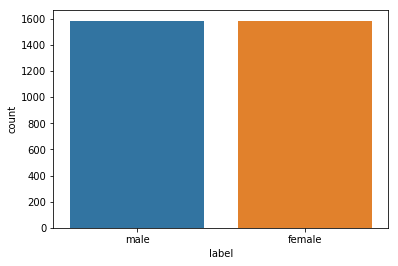

In [20]:
sb.countplot('label',data=dataset)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

### Em nossos dados exitem apenas um variável *label* que é  Qualitativa Nominal sendo que demais são do tipo Quantitativa Contínua



In [21]:
dataset.dtypes
A = str(tipos)
A = A.replace('float64',"Qualitativa Nominal")
A = A.replace('object',"Quantitativa Contínua")

print(A)

meanfreq    Qualitativa Nominal
sd          Qualitativa Nominal
median      Qualitativa Nominal
Q25         Qualitativa Nominal
Q75         Qualitativa Nominal
IQR         Qualitativa Nominal
skew        Qualitativa Nominal
kurt        Qualitativa Nominal
sp.ent      Qualitativa Nominal
sfm         Qualitativa Nominal
mode        Qualitativa Nominal
centroid    Qualitativa Nominal
meanfun     Qualitativa Nominal
minfun      Qualitativa Nominal
maxfun      Qualitativa Nominal
meandom     Qualitativa Nominal
mindom      Qualitativa Nominal
maxdom      Qualitativa Nominal
dfrange     Qualitativa Nominal
modindx     Qualitativa Nominal
label        Quantitativa Contínua
dtype: Quantitativa Contínua


# Medidas Resumo Variáveis Quantitativas:

## MEDIDAS DE POSIÇÃO: Moda, Média, Mediana, Percentís, Quartis.

##### Voltado na tabela  temos:
##### MEDIDAS DE POSIÇÃO, já  estão calculados na tabelas *describe* Media , Percentís, Quartis 
##### Faltando calcular  a Moda e  Mediana  sabendo  a Mediana e a mesma medias Na colunaE o valor da coluna  **50%** da tabela.

A média é uma medida de tendência central que indica o valor onde estão concentrados os dados de um conjunto de valores, representando um valor significativo para o mesmo.

A mediana é o valor que separa a metade superior da metade inferior de uma distribuição de dados, ou o valor no centro da distribuição.

A moda é simples. Nada mais é que o valor que mais se repete dentro de um conjunto.





In [22]:
dataset.describe().transpose()

count    mean      std        min    25%    50%     75%       max
meanfreq  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251
sd        3168.0   0.057    0.017  1.836e-02  0.042  0.059   0.067     0.115
median    3168.0   0.186    0.036  1.097e-02  0.170  0.190   0.211     0.261
Q25       3168.0   0.140    0.049  2.288e-04  0.111  0.140   0.176     0.247
Q75       3168.0   0.225    0.024  4.295e-02  0.209  0.226   0.244     0.273
IQR       3168.0   0.084    0.043  1.456e-02  0.043  0.094   0.114     0.252
skew      3168.0   3.140    4.241  1.417e-01  1.650  2.197   2.932    34.725
kurt      3168.0  36.568  134.929  2.068e+00  5.670  8.318  13.649  1309.613
sp.ent    3168.0   0.895    0.045  7.387e-01  0.862  0.902   0.929     0.982
sfm       3168.0   0.408    0.178  3.688e-02  0.258  0.396   0.534     0.843
mode      3168.0   0.165    0.077  0.000e+00  0.118  0.187   0.221     0.280
centroid  3168.0   0.181    0.030  3.936e-02  0.164  0.185   0.199     0.251
meanfun   3168.0   0.143    0.032  5.557e-02  0.117  0.141   0.170     0.238
minfun    3168.0   0.037    0.019  9.775e-03  0.018  0.046   0.048     0.204
maxfun    3168.0   0.259    0.030  1.031e-01  0.254  0.271   0.277     0.279
meandom   3168.0   0.829    0.525  7.812e-03  0.420  0.766   1.177     2.958
mindom    3168.0   0.053    0.063  4.883e-03  0.008  0.023   0.070     0.459
maxdom    3168.0   5.047    3.521  7.812e-03  2.070  4.992   7.008    21.867
dfrange   3168.0   4.995    3.520  0.000e+00  2.045  4.945   6.992    21.844
modindx   3168.0   0.174    0.119  0.000e+00  0.100  0.139   0.209     0.932

## Vamos calcular Moda e Mediana que faltam na tabela.

### Moda

In [23]:
Modadic = {}
Medianaadic = {}
for x in colunas:
    if x == "label":
        continue
    Modadic[x]=dataset[x].mode()[0]
    Medianaadic[x]=dataset[x].median()
    
    


### Calculado a moda  e mediana e colocando em dicionário.

In [24]:
print(Modadic)

{'meanfreq': 0.212189914901046, 'sd': 0.0431904308902847, 'median': 0.18666666666666698, 'Q25': 0.14, 'Q75': 0.24, 'IQR': 0.035, 'skew': 1.8625728085862199, 'kurt': 6.10979028593433, 'sp.ent': 0.8597123484255591, 'sfm': 0.0849343635514977, 'mode': 0.0, 'centroid': 0.212189914901046, 'meanfun': 0.133667302572349, 'minfun': 0.0469208211143695, 'maxfun': 0.27906976744186, 'meandom': 0.0078125, 'mindom': 0.0234375, 'maxdom': 0.0078125, 'dfrange': 0.0, 'modindx': 0.0}


In [25]:
print(Medianaadic)

{'meanfreq': 0.18483840942471752, 'sd': 0.05915511912795825, 'median': 0.19003237922971, 'Q25': 0.1402864183481785, 'Q75': 0.22568421491103252, 'IQR': 0.09427995391705071, 'skew': 2.197100657225325, 'kurt': 8.31846328859801, 'sp.ent': 0.9017668303293546, 'sfm': 0.396335156832049, 'mode': 0.18659863945578248, 'centroid': 0.18483840942471752, 'meanfun': 0.14051851802812348, 'minfun': 0.0461095100864553, 'maxfun': 0.271186440677966, 'meandom': 0.7657948369565215, 'mindom': 0.0234375, 'maxdom': 4.9921875, 'dfrange': 4.9453125, 'modindx': 0.13935702262536853}


### Transformando  os resultados em data frame.

In [26]:
dfModa = pandas.DataFrame.from_dict(Modadic, orient="index").reset_index()
dfModa.columns = ["quantitativas","moda"]
dfModa.head()

quantitativas   moda
0      meanfreq  0.212
1            sd  0.043
2        median  0.187
3           Q25  0.140
4           Q75  0.240

In [27]:
dfmediana = pandas.DataFrame.from_dict(Medianaadic, orient="index").reset_index()
dfmediana.columns = ["quantitativas","mediana"]
dfmediana.head()







quantitativas  mediana
0      meanfreq    0.185
1            sd    0.059
2        median    0.190
3           Q25    0.140
4           Q75    0.226

In [28]:
### usado para unir os dataframes.
df50porcento = pandas.DataFrame.from_dict(Medianaadic, orient="index").reset_index()
df50porcento.columns = ["quantitativas","50%"]
df50porcento.head()

quantitativas    50%
0      meanfreq  0.185
1            sd  0.059
2        median  0.190
3           Q25  0.140
4           Q75  0.226

### Montado em um único data frame.

In [29]:
dfmediaModa=pandas.merge(dfModa,dfmediana,how='left',on='quantitativas')
dfmediaModa=pandas.merge(dfmediaModa,df50porcento,how='left',on='quantitativas')


In [30]:
print(dfmediaModa)

   quantitativas   moda  mediana    50%
0       meanfreq  0.212    0.185  0.185
1             sd  0.043    0.059  0.059
2         median  0.187    0.190  0.190
3            Q25  0.140    0.140  0.140
4            Q75  0.240    0.226  0.226
5            IQR  0.035    0.094  0.094
6           skew  1.863    2.197  2.197
7           kurt  6.110    8.318  8.318
8         sp.ent  0.860    0.902  0.902
9            sfm  0.085    0.396  0.396
10          mode  0.000    0.187  0.187
11      centroid  0.212    0.185  0.185
12       meanfun  0.134    0.141  0.141
13        minfun  0.047    0.046  0.046
14        maxfun  0.279    0.271  0.271
15       meandom  0.008    0.766  0.766
16        mindom  0.023    0.023  0.023
17        maxdom  0.008    4.992  4.992
18       dfrange  0.000    4.945  4.945
19       modindx  0.000    0.139  0.139


## MEDIDAS DE DISPERSÃO: Amplitude, Intervalo-Interquartil, Variância, Desvio Padrão, Coeficiente de Variação.

## Finalidade: encontrar um valor que resuma a variabilidade de um conjunto de dados 


A amplitude nada mais é do que a diferença entre o maior e o menor valor de um conjunto de dados.
A variância é uma medida que expressa quanto os dados de um conjunto estão afastados de seu valor esperado.
O desvio padrão também é uma medida de dispersão, que indica quanto os dados estão afastados da média.

O coeficiente de varição é usado para expressar a variabilidade dos dados estatísticos excluindo a influência da ordem de grandeza da variável.

### Montar a tabela com todos dados estatísticos até agora.

In [31]:
dados_estatisticos = dataset.describe().transpose()
dados_estatisticos=pandas.merge(dfmediaModa,dados_estatisticos,how='right',on='50%')
print(dados_estatisticos)
dados_estatisticos

   quantitativas   moda  mediana    50%   count    mean      std        min    25%     75%  \
0       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
1       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
2       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
3       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
4             sd  0.043    0.059  0.059  3168.0   0.057    0.017  1.836e-02  0.042   0.067   
5         median  0.187    0.190  0.190  3168.0   0.186    0.036  1.097e-02  0.170   0.211   
6            Q25  0.140    0.140  0.140  3168.0   0.140    0.049  2.288e-04  0.111   0.176   
7            Q75  0.240    0.226  0.226  3168.0   0.225    0.024  4.295e-02  0.209   0.244   
8            IQR  0.035    0.094  0.094  3168.0   0.084    0.043  1.456e-02  0.043   0.114   
9           skew  1.863    2.197  2.197  3168.0   3.140    4

quantitativas   moda  mediana    50%   count    mean      std        min    25%     75%  \
0       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
1       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
2       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
3       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
4             sd  0.043    0.059  0.059  3168.0   0.057    0.017  1.836e-02  0.042   0.067   
5         median  0.187    0.190  0.190  3168.0   0.186    0.036  1.097e-02  0.170   0.211   
6            Q25  0.140    0.140  0.140  3168.0   0.140    0.049  2.288e-04  0.111   0.176   
7            Q75  0.240    0.226  0.226  3168.0   0.225    0.024  4.295e-02  0.209   0.244   
8            IQR  0.035    0.094  0.094  3168.0   0.084    0.043  1.456e-02  0.043   0.114   
9           skew  1.863    2.197  2.197  3168.0   3.140    4.241  1.417e-01  1.650   2.932   
10          kurt  6.110    8.318  8.318  3168.0  36.568  134.929  2.068e+00  5.670  13.649   
11        sp.ent  0.860    0.902  0.902  3168.0   0.895    0.045  7.387e-01  0.862   0.929   
12           sfm  0.085    0.396  0.396  3168.0   0.408    0.178  3.688e-02  0.258   0.534   
13          mode  0.000    0.187  0.187  3168.0   0.165    0.077  0.000e+00  0.118   0.221   
14       meanfun  0.134    0.141  0.141  3168.0   0.143    0.032  5.557e-02  0.117   0.170   
15        minfun  0.047    0.046  0.046  3168.0   0.037    0.019  9.775e-03  0.018   0.048   
16        maxfun  0.279    0.271  0.271  3168.0   0.259    0.030  1.031e-01  0.254   0.277   
17       meandom  0.008    0.766  0.766  3168.0   0.829    0.525  7.812e-03  0.420   1.177   
18        mindom  0.023    0.023  0.023  3168.0   0.053    0.063  4.883e-03  0.008   0.070   
19        maxdom  0.008    4.992  4.992  3168.0   5.047    3.521  7.812e-03  2.070   7.008   
20       dfrange  0.000    4.945  4.945  3168.0   4.995    3.520  0.000e+00  2.045   6.992   
21       modindx  0.000    0.139  0.139  3168.0   0.174    0.119  0.000e+00  0.100   0.209   

         max  
0      0.251  
1      0.251  
2      0.251  
3      0.251  
4      0.115  
5      0.261  
6      0.247  
7      0.273  
8      0.252  
9     34.725  
10  1309.613  
11     0.982  
12     0.843  
13     0.280  
14     0.238  
15     0.204  
16     0.279  
17     2.958  
18     0.459  
19    21.867  
20    21.844  
21     0.932

## Na tabela já temos os valores para Intervalo-Interquartil e Desvio Padrão , Resta calcularmos a Amplitude , Variância e, Coeficiente de Variação e Intervalo-Interquartil.

## Amplitude.

In [32]:
print(dataset['meanfreq'].max() - dataset['meanfreq'].min())

0.21176041613672117


## Variância.

In [33]:
print(dataset['meanfreq'].var())

0.0008950770245104506


O cálculo do coeficiente de variação é feito através da fórmula:

 cv/



Onde,
 s → é o desvio padrão
X ? → é a média dos dados
CV → é o coeficiente de variação

<img style="-webkit-user-select: none;margin: auto;" src="https://static.mundoeducacao.bol.uol.com.br/mundoeducacao/conteudo/coefvariacao.jpg">



## Coeficiente de Variação.

In [34]:
print(   (dataset['meanfreq'].std()/dataset['meanfreq'].mean()) *  100      )

16.537725093072137


## Intervalo-Interquartil.
É a diferença entre o terceiro quartil e o primeiro
quartil, ou seja,
d= Q3-Q1

In [35]:
print(dataset['meanfreq'].quantile(q=0.75))

0.19914605089620624


In [36]:
print(dataset['meanfreq'].quantile(q=0.25))

0.1636621363172535


In [37]:
print(dataset['meanfreq'].quantile(q=0.75) - dataset['meanfreq'].quantile(q=0.25))

0.03548391457895275


### Operando todos cálculos: Amplitude,Variância, Coeficiente de Variação e Intervalo-Interquartil.

In [38]:
Amplitudedic = {}
Varianciadic = {}
CoeficienteVardic = {}
IntervaloInterquartildic = {}
for x in colunas:
    if x == "label":
        continue
    Amplitudedic[x]=dataset[x].max() - dataset[x].min()
    Varianciadic[x] = dataset[x].var()
    CoeficienteVardic[x] = (dataset[x].std()/dataset[x].mean()) *  100
    IntervaloInterquartildic[x] = dataset[x].quantile(q=0.75) - dataset[x].quantile(q=0.25)
    


### Transfomando os resultados em dataframe.

In [39]:
dfAmplitude = pandas.DataFrame.from_dict(Amplitudedic, orient="index").reset_index()
dfAmplitude.columns = ["quantitativas","Amplitude"]
dfAmplitude.head()

quantitativas  Amplitude
0      meanfreq      0.212
1            sd      0.097
2        median      0.250
3           Q25      0.247
4           Q75      0.231

In [40]:
dfVariancia = pandas.DataFrame.from_dict(Varianciadic, orient="index").reset_index()
dfVariancia.columns = ["quantitativas","Variancia"]
dfVariancia.head()

quantitativas  Variancia
0      meanfreq  8.951e-04
1            sd  2.773e-04
2        median  1.322e-03
3           Q25  2.370e-03
4           Q75  5.588e-04

In [41]:
dfCoeficiente = pandas.DataFrame.from_dict(CoeficienteVardic, orient="index").reset_index()
dfCoeficiente.columns = ["quantitativas","Coef_Var_%"]
dfCoeficiente.head()

quantitativas  Coef_Var_%
0      meanfreq      16.538
1            sd      29.150
2        median      19.588
3           Q25      34.658
4           Q75      10.517

In [42]:
IntervaloInterquartil = pandas.DataFrame.from_dict(IntervaloInterquartildic, orient="index").reset_index()
IntervaloInterquartil.columns = ["quantitativas","Intervalo_Interquartil"]
IntervaloInterquartil.head()

quantitativas  Intervalo_Interquartil
0      meanfreq                   0.035
1            sd                   0.025
2        median                   0.041
3           Q25                   0.065
4           Q75                   0.035

## Mesclando os resultados.

In [43]:
dfresultado_frame=pandas.merge(dfAmplitude,dfVariancia,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,dfCoeficiente,how='right',on='quantitativas')
dfresultado_frame=pandas.merge(dfresultado_frame,IntervaloInterquartil,how='right',on='quantitativas')
print(dfresultado_frame)
dfresultado_frame

   quantitativas  Amplitude  Variancia  Coef_Var_%  Intervalo_Interquartil
0       meanfreq      0.212  8.951e-04      16.538                   0.035
1             sd      0.097  2.773e-04      29.150                   0.025
2         median      0.250  1.322e-03      19.588                   0.041
3            Q25      0.247  2.370e-03      34.658                   0.065
4            Q75      0.231  5.588e-04      10.517                   0.035
5            IQR      0.238  1.830e-03      50.745                   0.072
6           skew     34.584  1.798e+01     135.041                   1.282
7           kurt   1307.544  1.821e+04     368.976                   7.979
8         sp.ent      0.243  2.023e-03       5.025                   0.067
9            sfm      0.806  3.151e-02      43.487                   0.276
10          mode      0.280  5.960e-03      46.710                   0.103
11      centroid      0.212  8.951e-04      16.538                   0.035
12       meanfun      0.1

quantitativas  Amplitude  Variancia  Coef_Var_%  Intervalo_Interquartil
0       meanfreq      0.212  8.951e-04      16.538                   0.035
1             sd      0.097  2.773e-04      29.150                   0.025
2         median      0.250  1.322e-03      19.588                   0.041
3            Q25      0.247  2.370e-03      34.658                   0.065
4            Q75      0.231  5.588e-04      10.517                   0.035
5            IQR      0.238  1.830e-03      50.745                   0.072
6           skew     34.584  1.798e+01     135.041                   1.282
7           kurt   1307.544  1.821e+04     368.976                   7.979
8         sp.ent      0.243  2.023e-03       5.025                   0.067
9            sfm      0.806  3.151e-02      43.487                   0.276
10          mode      0.280  5.960e-03      46.710                   0.103
11      centroid      0.212  8.951e-04      16.538                   0.035
12       meanfun      0.182  1.044e-03      22.621                   0.053
13        minfun      0.194  3.694e-04      52.226                   0.030
14        maxfun      0.176  9.046e-04      11.620                   0.023
15       meandom      2.950  2.758e-01      63.338                   0.757
16        mindom      0.454  4.007e-03     120.234                   0.062
17        maxdom     21.859  1.240e+01      69.763                   4.938
18       dfrange     21.844  1.239e+01      70.476                   4.947
19       modindx      0.932  1.427e-02      68.750                   0.109

## Mesclando os resultados com tabela de resumo estatístico.

In [44]:
dados_estatisticos=pandas.merge(dados_estatisticos,dfresultado_frame,how='right',on='quantitativas')
#dados_estatisticos[[quantitativas]]
#dados_estatisticos = dados_estatisticos.drop_duplicates()
print(dados_estatisticos)
#dados_estatisticos = dados_estatisticos[["quantitativas"]]
#print(dados_estatisticos)
dados_estatisticos

   quantitativas   moda  mediana    50%   count    mean      std        min    25%     75%  \
0       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
1       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
2       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
3       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
4             sd  0.043    0.059  0.059  3168.0   0.057    0.017  1.836e-02  0.042   0.067   
5         median  0.187    0.190  0.190  3168.0   0.186    0.036  1.097e-02  0.170   0.211   
6            Q25  0.140    0.140  0.140  3168.0   0.140    0.049  2.288e-04  0.111   0.176   
7            Q75  0.240    0.226  0.226  3168.0   0.225    0.024  4.295e-02  0.209   0.244   
8            IQR  0.035    0.094  0.094  3168.0   0.084    0.043  1.456e-02  0.043   0.114   
9           skew  1.863    2.197  2.197  3168.0   3.140    4

quantitativas   moda  mediana    50%   count    mean      std        min    25%     75%  \
0       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
1       meanfreq  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
2       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
3       centroid  0.212    0.185  0.185  3168.0   0.181    0.030  3.936e-02  0.164   0.199   
4             sd  0.043    0.059  0.059  3168.0   0.057    0.017  1.836e-02  0.042   0.067   
5         median  0.187    0.190  0.190  3168.0   0.186    0.036  1.097e-02  0.170   0.211   
6            Q25  0.140    0.140  0.140  3168.0   0.140    0.049  2.288e-04  0.111   0.176   
7            Q75  0.240    0.226  0.226  3168.0   0.225    0.024  4.295e-02  0.209   0.244   
8            IQR  0.035    0.094  0.094  3168.0   0.084    0.043  1.456e-02  0.043   0.114   
9           skew  1.863    2.197  2.197  3168.0   3.140    4.241  1.417e-01  1.650   2.932   
10          kurt  6.110    8.318  8.318  3168.0  36.568  134.929  2.068e+00  5.670  13.649   
11        sp.ent  0.860    0.902  0.902  3168.0   0.895    0.045  7.387e-01  0.862   0.929   
12           sfm  0.085    0.396  0.396  3168.0   0.408    0.178  3.688e-02  0.258   0.534   
13          mode  0.000    0.187  0.187  3168.0   0.165    0.077  0.000e+00  0.118   0.221   
14       meanfun  0.134    0.141  0.141  3168.0   0.143    0.032  5.557e-02  0.117   0.170   
15        minfun  0.047    0.046  0.046  3168.0   0.037    0.019  9.775e-03  0.018   0.048   
16        maxfun  0.279    0.271  0.271  3168.0   0.259    0.030  1.031e-01  0.254   0.277   
17       meandom  0.008    0.766  0.766  3168.0   0.829    0.525  7.812e-03  0.420   1.177   
18        mindom  0.023    0.023  0.023  3168.0   0.053    0.063  4.883e-03  0.008   0.070   
19        maxdom  0.008    4.992  4.992  3168.0   5.047    3.521  7.812e-03  2.070   7.008   
20       dfrange  0.000    4.945  4.945  3168.0   4.995    3.520  0.000e+00  2.045   6.992   
21       modindx  0.000    0.139  0.139  3168.0   0.174    0.119  0.000e+00  0.100   0.209   

         max  Amplitude  Variancia  Coef_Var_%  Intervalo_Interquartil  
0      0.251      0.212  8.951e-04      16.538                   0.035  
1      0.251      0.212  8.951e-04      16.538                   0.035  
2      0.251      0.212  8.951e-04      16.538                   0.035  
3      0.251      0.212  8.951e-04      16.538                   0.035  
4      0.115      0.097  2.773e-04      29.150                   0.025  
5      0.261      0.250  1.322e-03      19.588                   0.041  
6      0.247      0.247  2.370e-03      34.658                   0.065  
7      0.273      0.231  5.588e-04      10.517                   0.035  
8      0.252      0.238  1.830e-03      50.745                   0.072  
9     34.725     34.584  1.798e+01     135.041                   1.282  
10  1309.613   1307.544  1.821e+04     368.976                   7.979  
11     0.982      0.243  2.023e-03       5.025                   0.067  
12     0.843      0.806  3.151e-02      43.487                   0.276  
13     0.280      0.280  5.960e-03      46.710                   0.103  
14     0.238      0.182  1.044e-03      22.621                   0.053  
15     0.204      0.194  3.694e-04      52.226                   0.030  
16     0.279      0.176  9.046e-04      11.620                   0.023  
17     2.958      2.950  2.758e-01      63.338                   0.757  
18     0.459      0.454  4.007e-03     120.234                   0.062  
19    21.867     21.859  1.240e+01      69.763                   4.938  
20    21.844     21.844  1.239e+01      70.476                   4.947  
21     0.932      0.932  1.427e-02      68.750                   0.109

# ORGANIZAÇÃO E REPRESENTAÇÃO DOS DADOS


Tabela de freqüência: relaciona categorias (ou classes) de valores,juntamente com contagem (ou freqüências) do número de valores que
se enquadram em cada categoria ou classe.

## Variáveis qualitativas:

#### Temos apenas uma classe qualitativa a variável *label* fazendo a análise:

Tamanho do dataset.

In [45]:
print(dataset.shape)

(3168, 21)


Agrupar pela variável label.

In [46]:
contagem = dataset.groupby('label').size()
print(contagem)

label
female    1584
male      1584
dtype: int64


Prepara os resultados.

In [47]:
print(contagem[['female']][0])

1584


In [48]:
print(contagem[['male']][0])

1584


In [49]:
total=contagem[['female']][0] + contagem[['male']][0]

In [50]:
print(total)

3168


 #### Calculando a frequência relativa. fr =fi / n ou seja contagem por classe sobre total somada dos valores de cada classe.

In [51]:
freqFRsexodic={}
freqFRsexodic['female']=   contagem[['female']][0] / total
freqFRsexodic['male']=    contagem[['male']][0] / total
freqFRsexodic['Total']=   (  contagem[['female']][0] / total ) + (  contagem[['male']][0] / total)

In [52]:
freqFRsexodic

{'female': 0.5, 'male': 0.5, 'Total': 1.0}

 #### Calculando a  Frequência relativa percentual da categoria. fri% = fri * 100

In [53]:
freqFRpcsexodic={}
freqFRpcsexodic['female']=   freqFRsexodic['female'] * 100
freqFRpcsexodic['male']=    freqFRsexodic['male']  * 100
freqFRpcsexodic['Total']=  freqFRsexodic['Total']  * 100

In [54]:
freqFRpcsexodic

{'female': 50.0, 'male': 50.0, 'Total': 100.0}

In [55]:
freqsexodic={}
freqsexodic['female']=contagem[['female']][0]
freqsexodic['male']=contagem[['male']][0]
freqsexodic['Total']=total

In [56]:
freqsexodic

{'female': 1584, 'male': 1584, 'Total': 3168}

### Montado o drataframe com os resultados.

In [57]:
dffrequenciaSexo = pandas.DataFrame.from_dict(freqsexodic, orient="index").reset_index()
dffrequenciaSexo.columns = ["qualitivas","contagem"]

In [58]:
dffrequenciaSexoFR = pandas.DataFrame.from_dict(freqFRsexodic, orient="index").reset_index()
dffrequenciaSexoFR.columns = ["qualitivas","freqRelativa"]

In [59]:
dffrequenciaSexoFRpc = pandas.DataFrame.from_dict(freqFRpcsexodic, orient="index").reset_index()
dffrequenciaSexoFRpc.columns = ["qualitivas","freqRelativa%"]

In [60]:
dftabelaFreqQualitativas=pandas.merge(dffrequenciaSexo,dffrequenciaSexoFR,how='right',on='qualitivas')
dftabelaFreqQualitativas=pandas.merge(dftabelaFreqQualitativas,dffrequenciaSexoFRpc,how='right',on='qualitivas')

In [61]:
dftabelaFreqQualitativas

qualitivas  contagem  freqRelativa  freqRelativa%
0     female      1584           0.5           50.0
1       male      1584           0.5           50.0
2      Total      3168           1.0          100.0

In [62]:
print(dftabelaFreqQualitativas)

  qualitivas  contagem  freqRelativa  freqRelativa%
0     female      1584           0.5           50.0
1       male      1584           0.5           50.0
2      Total      3168           1.0          100.0


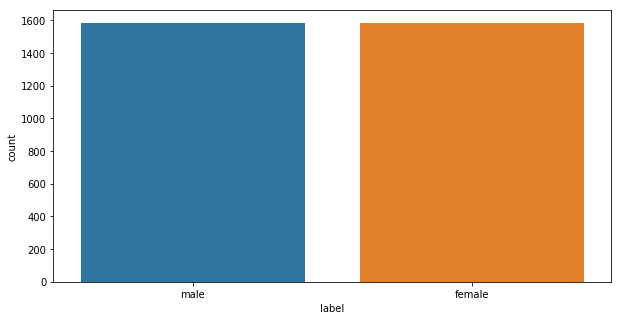

In [63]:
sb.countplot('label',data=dataset)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

## Organização e representação de variáveis quantitativas: Quantitativas continuas:

Procedimento de construção de tabelas de freqüência para
variáveis contínuas:
h = \frac{A}{k}
1. Escolha o número de intervalos de classe (k)
2. Identifique o menor valor (MIN) e o valor máximo (MAX) dos
dados.
3. Calcule a amplitude dos dados (A): A=MAX –MIN
4. Calcule o comprimento de cada intervalo de classe (h):
5. Arredonde o valor de h de forma que seja obtido um número
conveniente.
6. Obtenha os limites de cada intervalo de classe.
7. Construa uma tabela de freqüências, constituída pelas seguintes
colunas:
• Número de ordem de cada intervalo (i)
• Limites de cada intervalo. Os intervalos são fechados á esquerda e aberta à direita: NOTAÇÃO:|----

## Devido à complexidade (Muitas operações) dos cálculos vamos analisar via Histograma.

### Uma forma de calcular via pandas, Tabela muito elevada no resultado.

In [64]:
pandas.DataFrame(dataset['meanfreq'].value_counts(normalize=True)).head()

meanfreq
0.212  6.313e-04
0.214  6.313e-04
0.229  3.157e-04
0.100  3.157e-04
0.160  3.157e-04

## Histograma de freqüências relativas.

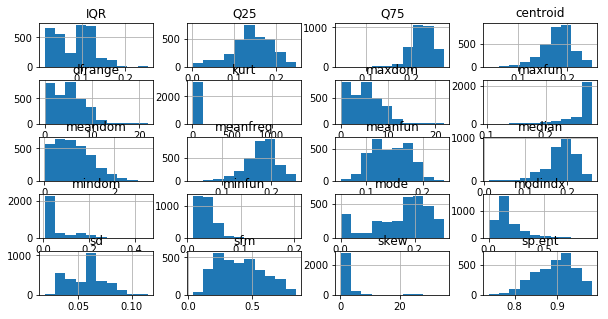

In [65]:

dataset.hist()
plt.rcParams['figure.figsize'] = (18,18)
plt.show()

### Fracionado os histogramas

In [66]:
### Fracionado os histogramas
n=0

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1361EDF0>,
      dtype=object)

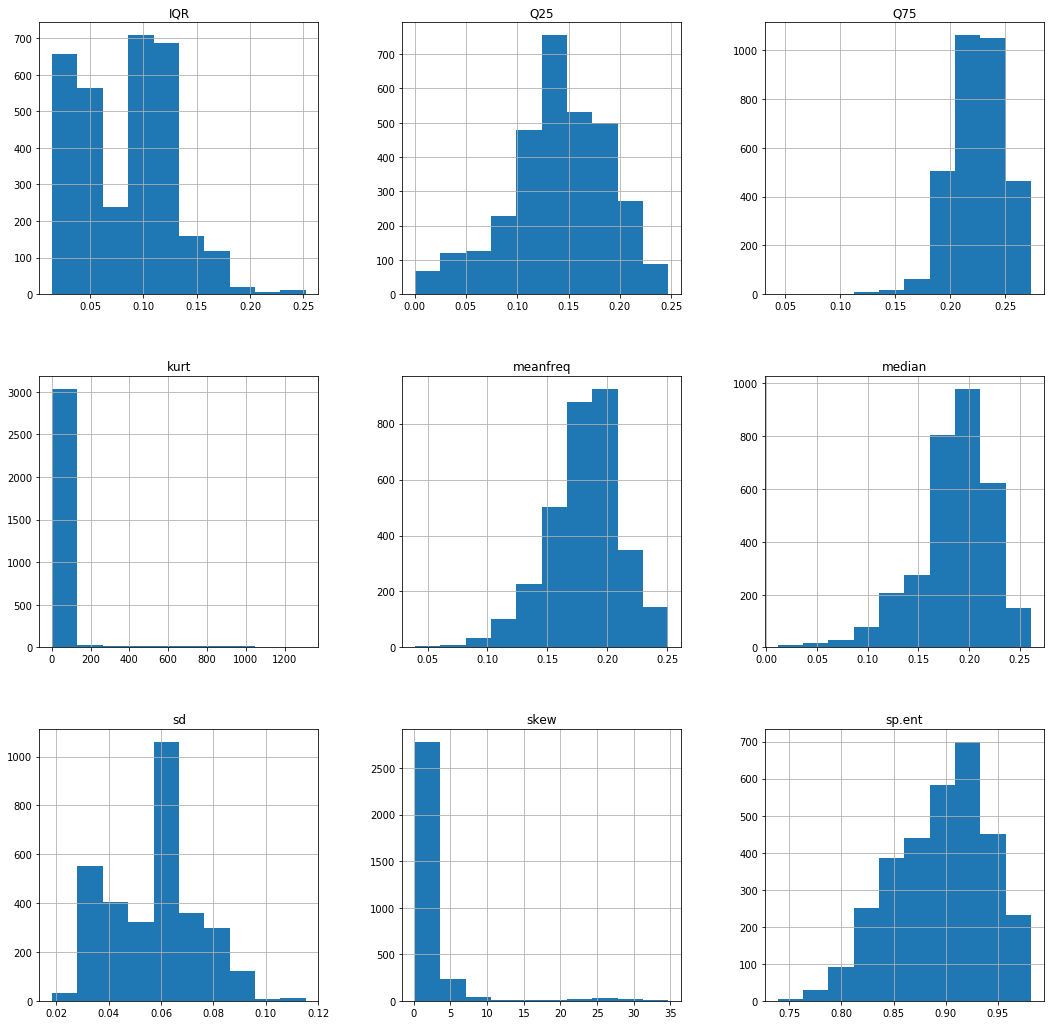

In [67]:
Part=dataset[colunas[n:n+9]]
n=n+9 -1
Part.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x138EB430>,
      dtype=object)

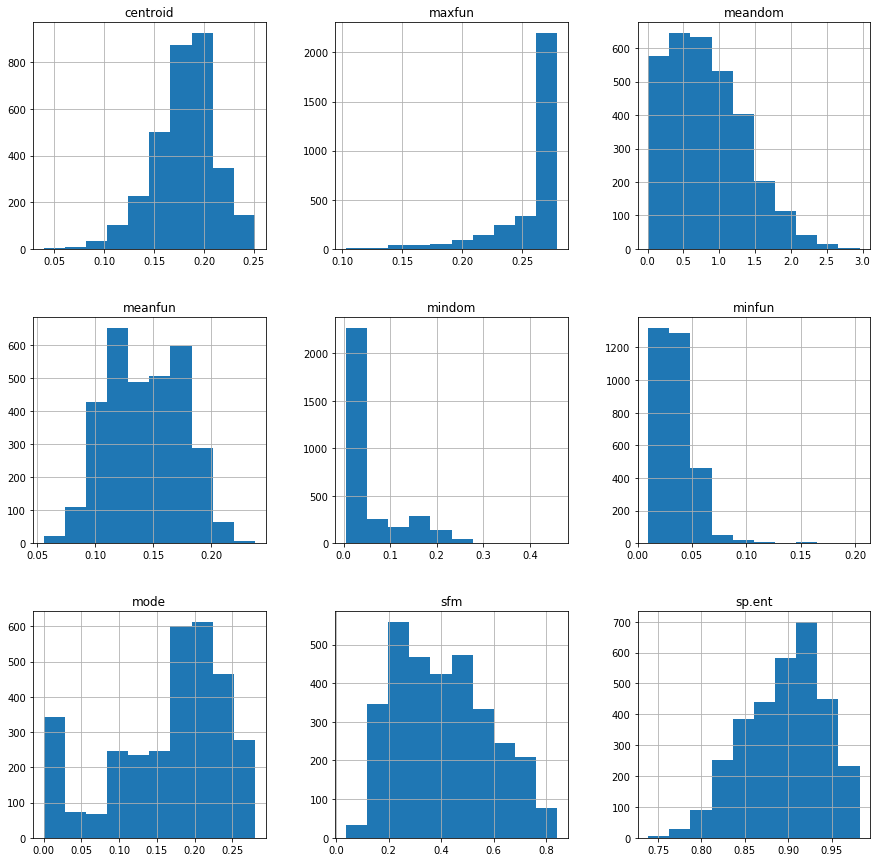

In [68]:
plt.rcParams['figure.figsize'] = (15,15)
plt.show()



Part=dataset[colunas[n:n+9]]
n=n+9
Part.hist()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x136CE650>,
      dtype=object)

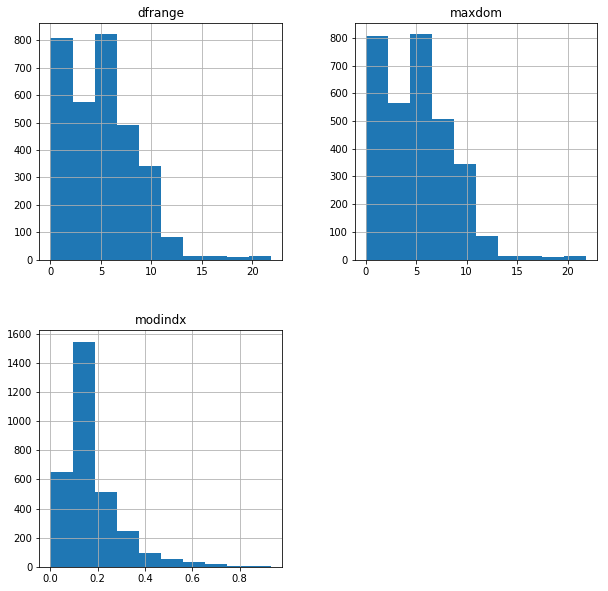

In [69]:
Part=dataset[colunas[n:n+9]]
plt.rcParams['figure.figsize'] = (10,10)
plt.show()
Part.hist()

# Histograma usando densidade de frequência e Assimetria da distribuição.

## Assimetria da distribuição.

As = \frac{\mu3}{\sigma^{2}}

Dessa forma podemos classificar o coeficiente de assimetria da seguinte forma:

- Se As=0, distribuição é simétrica
- Se As>0, distribuição assimétrica a direita (positiva)
- Se As<0, distribuição assimétrica a esquerda (negativa)
Fonte: Ferreira, D. F. Estatística Básica. Ed. UFLA, 2005. 664 p.



In [70]:
# PANDAS: Skew Assiemetria da distribuição
skew = dataset.skew()
print(skew)

meanfreq   -0.617
sd          0.137
median     -1.013
Q25        -0.491
Q75        -0.900
IQR         0.295
skew        4.933
kurt        5.873
sp.ent     -0.431
sfm         0.340
mode       -0.837
centroid   -0.617
meanfun     0.039
minfun      1.878
maxfun     -2.239
meandom     0.611
mindom      1.661
maxdom      0.726
dfrange     0.728
modindx     2.064
dtype: float64


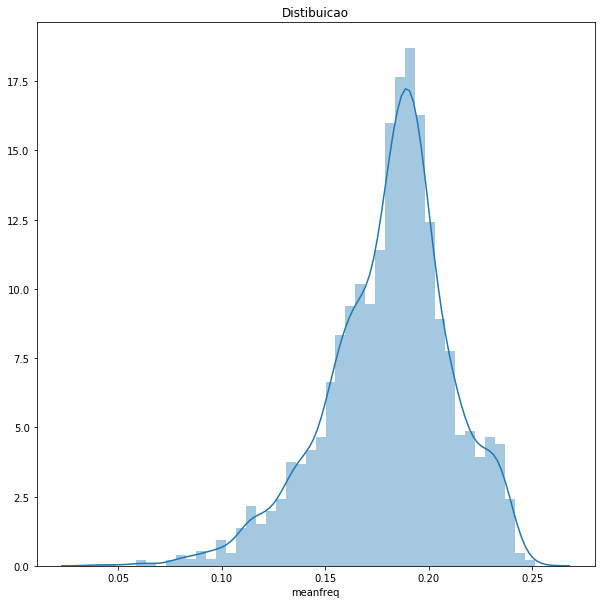

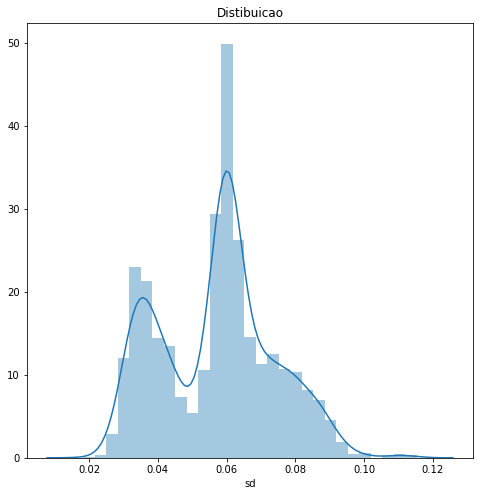

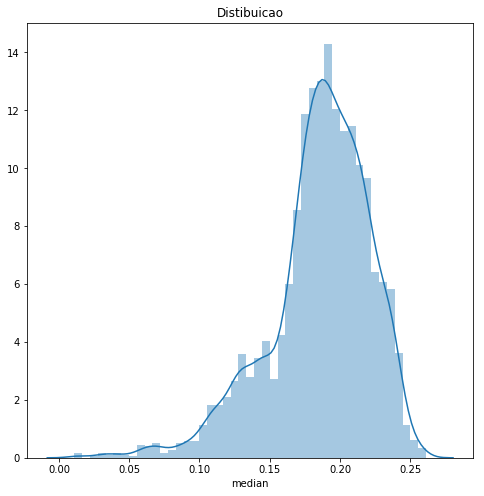

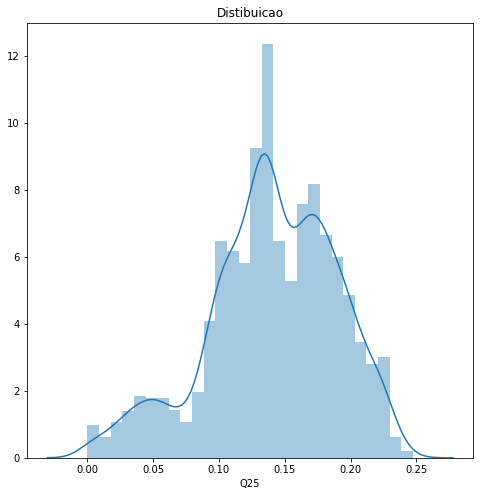

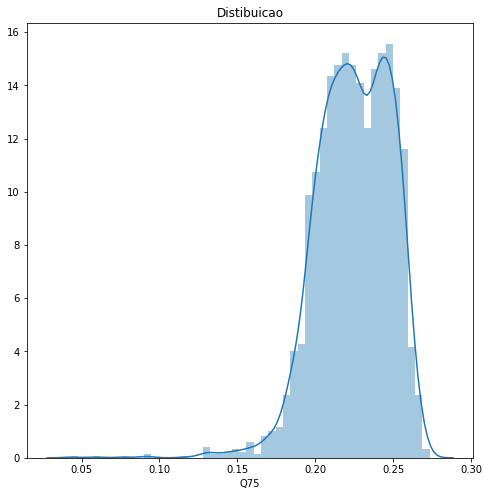

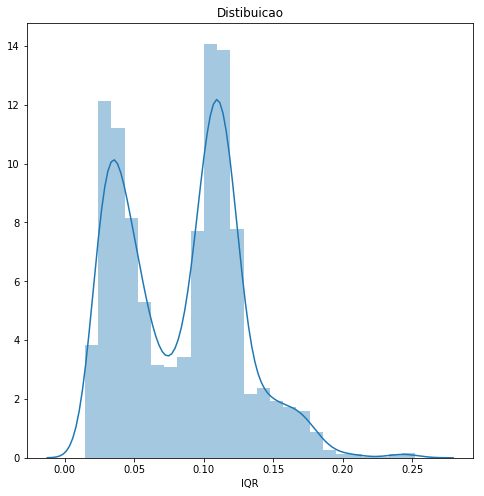

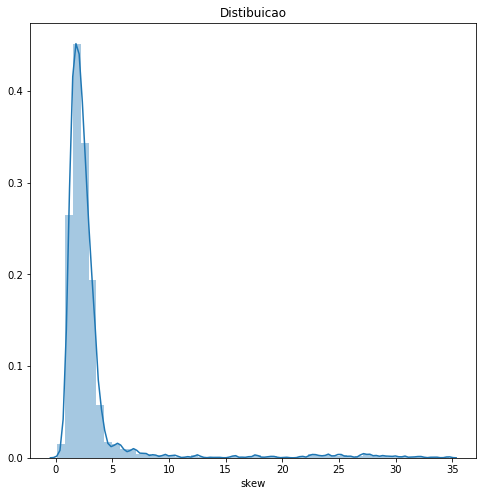

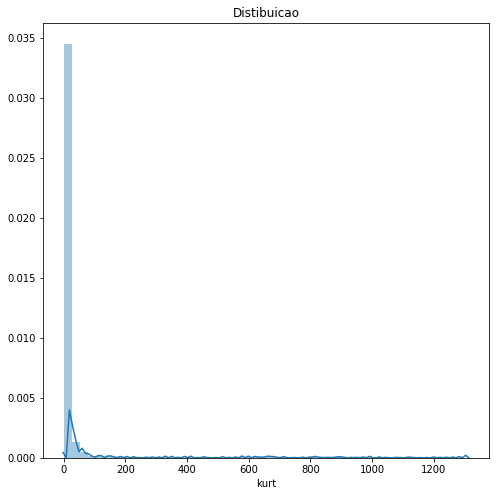

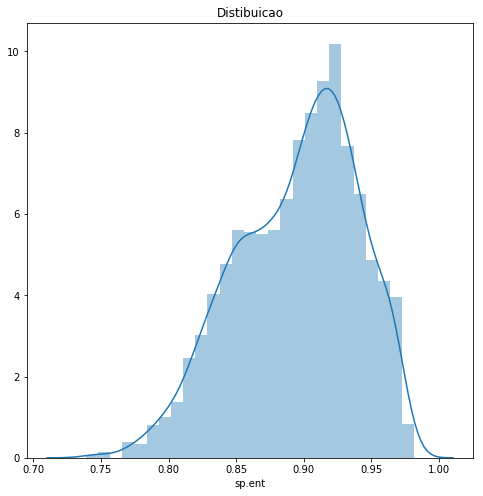

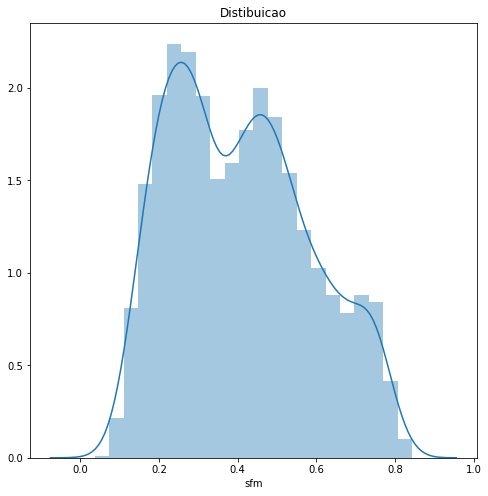

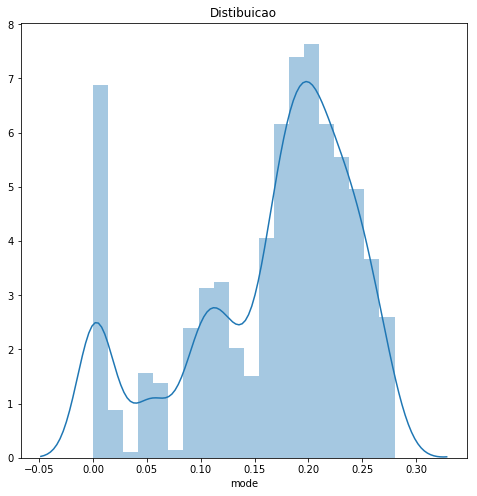

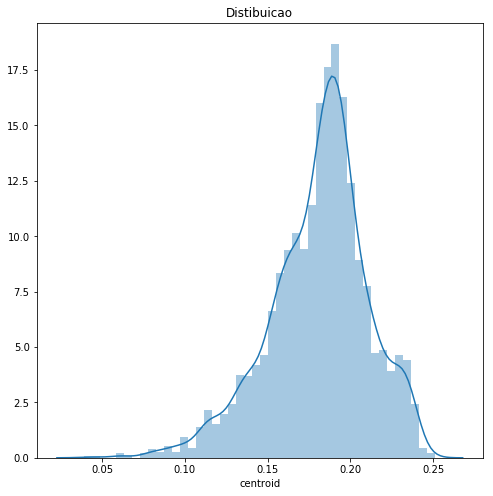

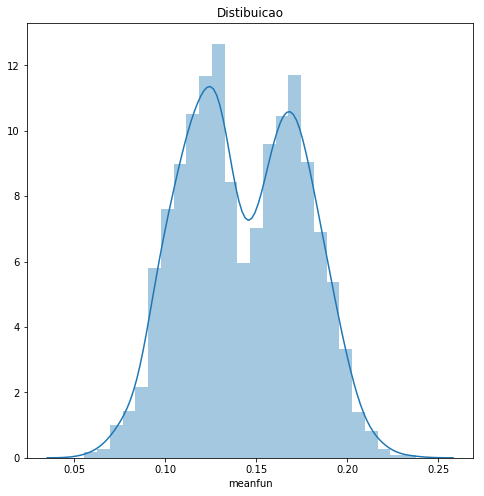

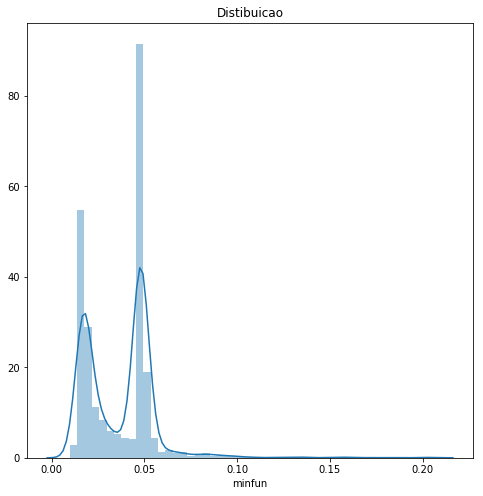

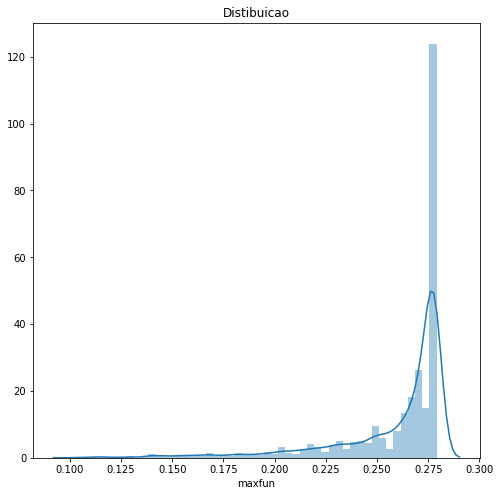

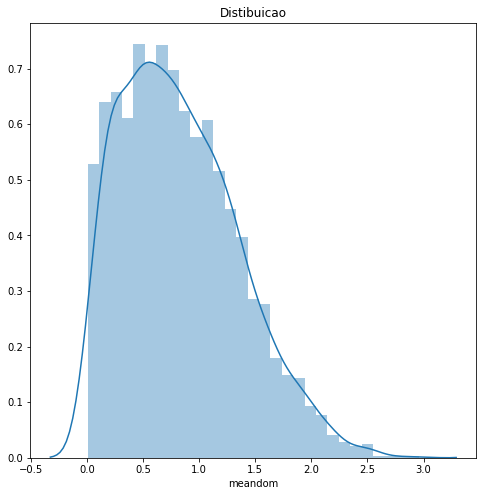

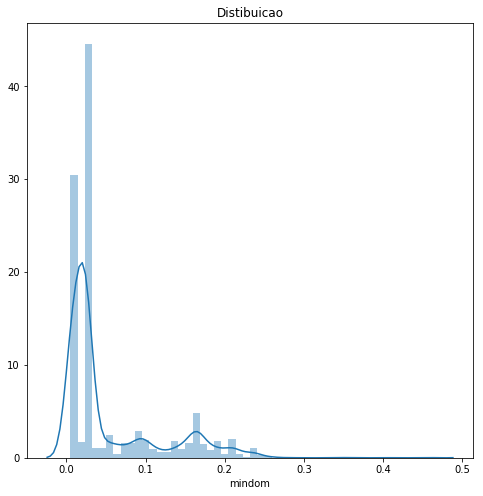

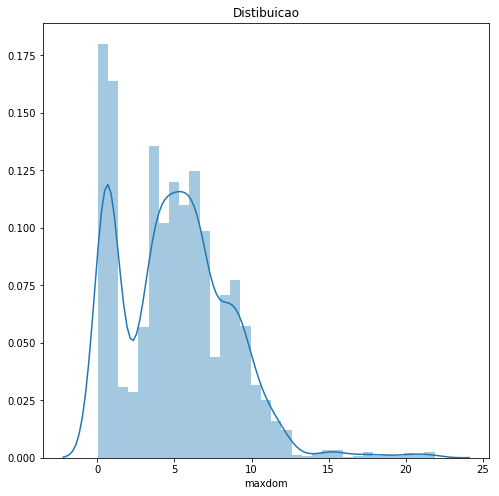

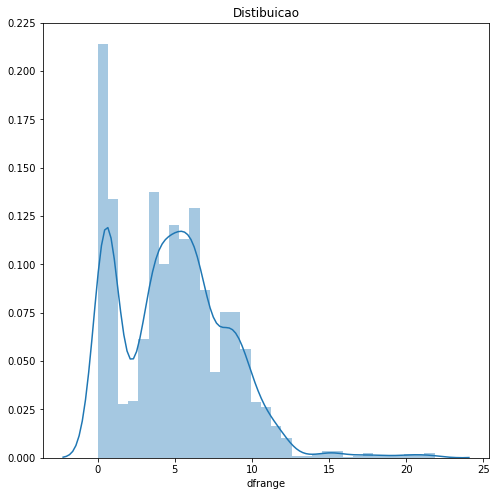

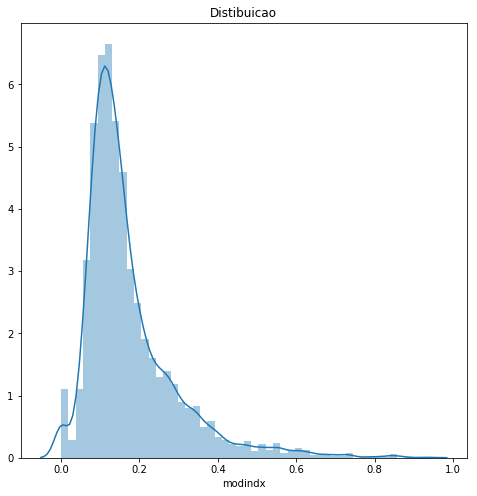

In [71]:

for y in colunas:
    if y == "label":
        continue
    Income = sb.distplot(dataset[y])
    plt.title("Distibuicao")
    plt.rcParams['figure.figsize'] = (8,8)
    plt.show(y)

# MATPLOTLIB: Gráfico de densidade (univariado)

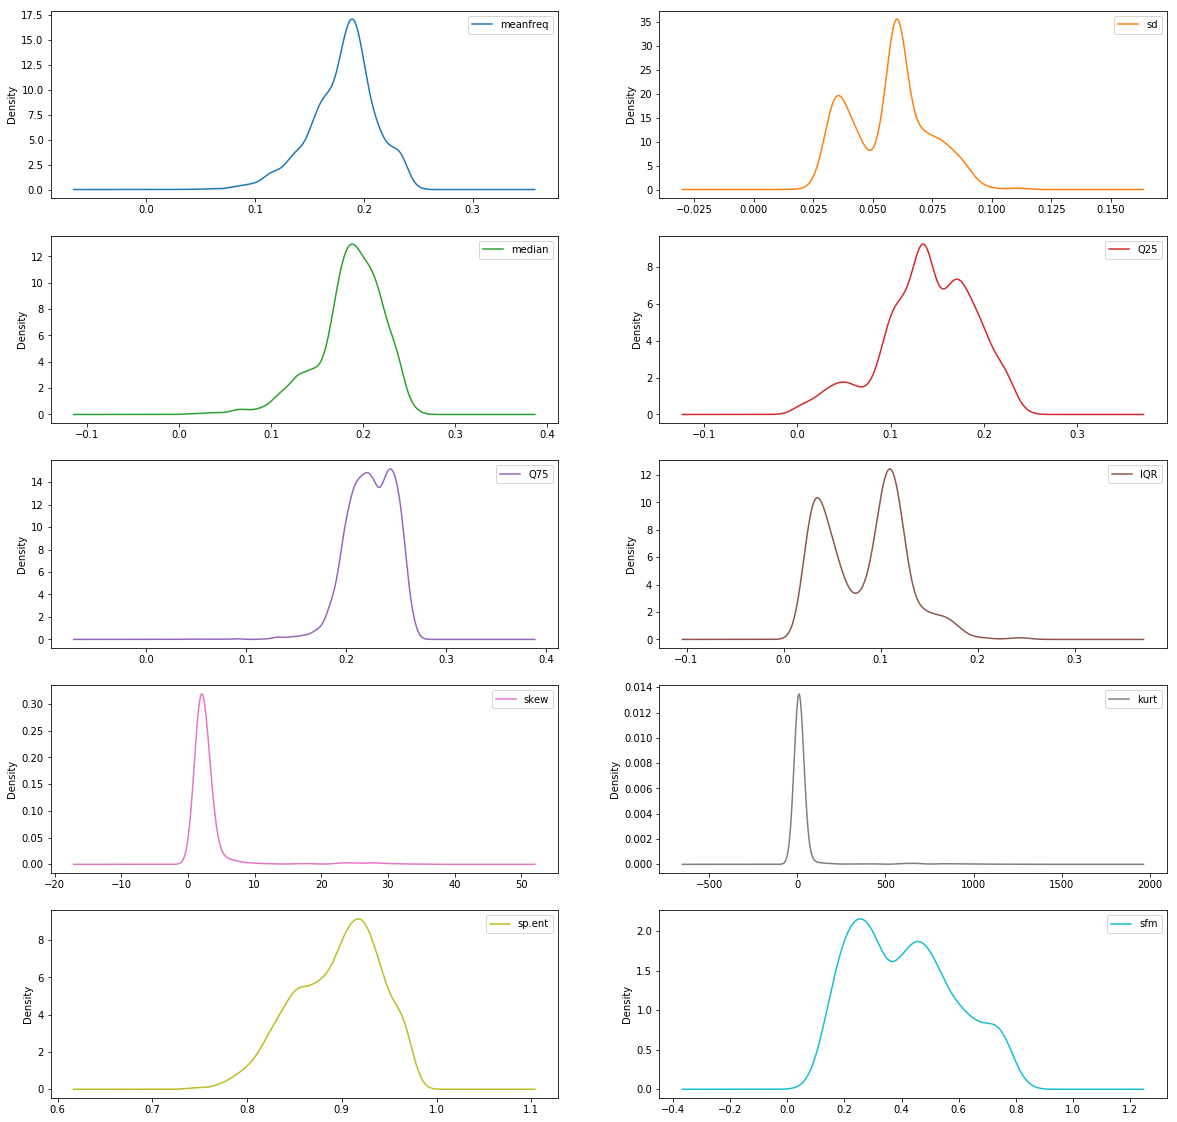

In [72]:

plt.rcParams['figure.figsize'] = (20,20)
dataset[colunas[0:10]].plot(kind='density', subplots=True, layout=(5,2), sharex=False)
plt.show()

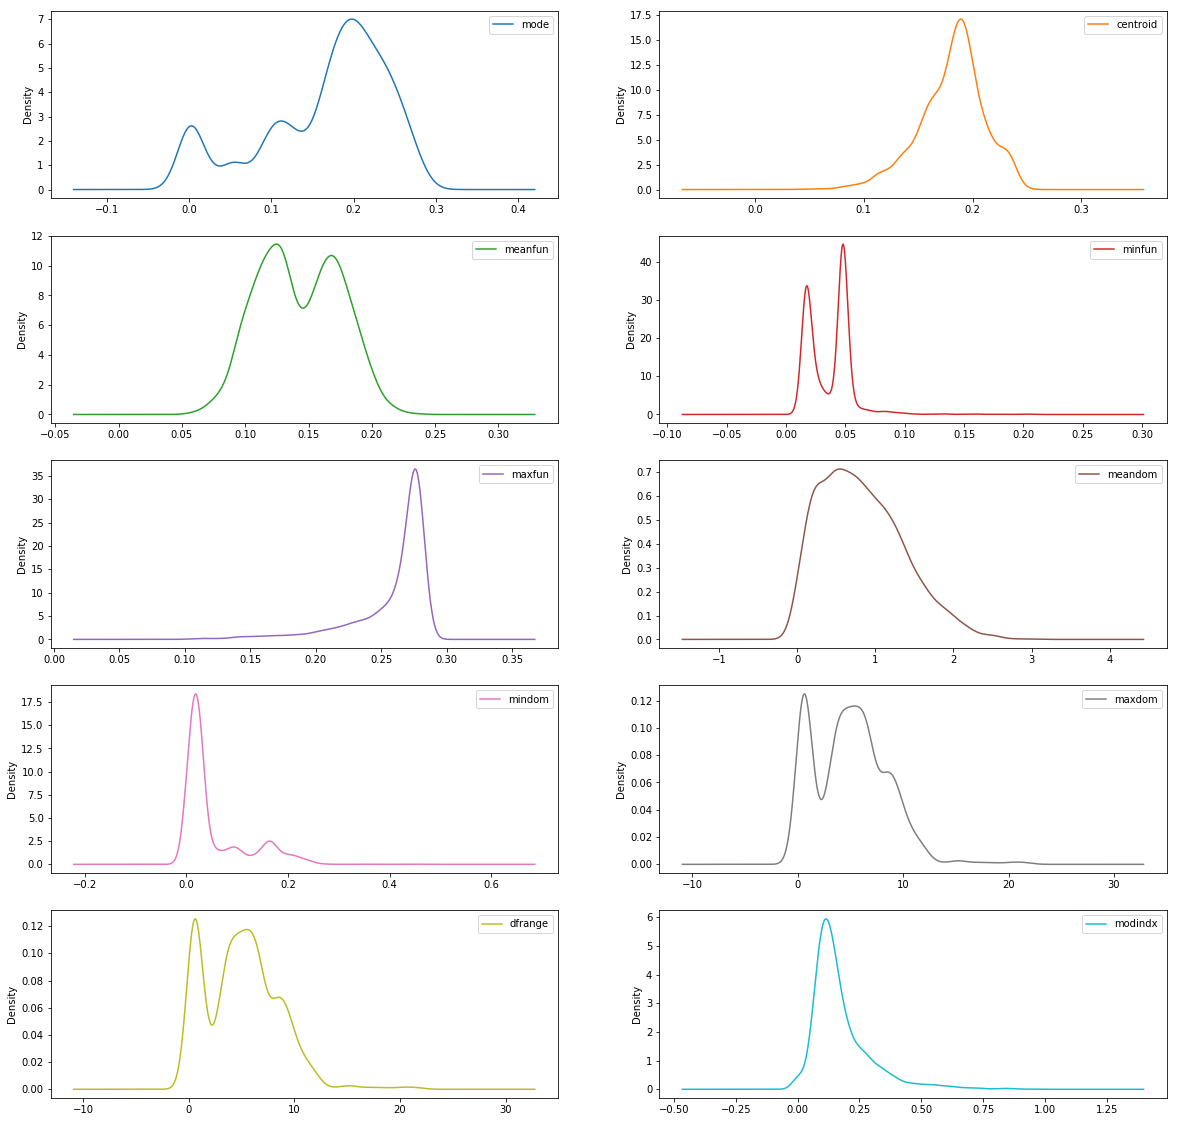

In [73]:
# MATPLOTLIB: Gráfico de densidade (univariado)
plt.rcParams['figure.figsize'] = (20,20)
dataset[colunas[10:20]].plot(kind='density', subplots=True, layout=(5,2), sharex=False)
plt.show()

## Calculando a curtose não-tendenciosa sobre o eixo solicitado usando a definição de curtose de Fisher (curtose de normal == 0,0). Normalizado por N-1:


A medida de curtose pode ser calculada da seguinte maneira:

k = \frac{\mu4}{\sigma^{4}}

De acordo com esta medida temos a seguinte classificação:

- k < 0, distribuição Platicúrtica
- k = 0, distribuição Mesocúrtica
- k > 0, distribuição Leptocúrtica

Fonte: Ferreira, D. F. Estatística Básica. Ed. UFLA, 2005. 664 p.



In [74]:
dataset.kurtosis()

meanfreq     0.805
sd          -0.522
median       1.630
Q25          0.018
Q75          2.982
IQR         -0.448
skew        25.363
kurt        35.932
sp.ent      -0.424
sfm         -0.836
mode        -0.256
centroid     0.805
meanfun     -0.860
minfun      10.758
maxfun       5.204
meandom     -0.055
mindom       2.188
maxdom       1.315
dfrange      1.318
modindx      5.925
dtype: float64

Interpretação: A assimetria da   variável *meanfun* é 0.039. Este valor implica que a distribuição dos dados é levemente assimétrica a direita ou positivamente assimétrica. É assimétrica a direita, pois o coeficiente é positivo, e levemente, pois está próximo de zero. Para a curtose, o valor é -0.860, implicando que a distribuição dos dados é Platicúrtica, pois o valor de curtose é menor que 0.

https://biostatistics-uem.github.io/Bio/figuras/curtose.png

## Classifcações das distribuiçoes.

In [75]:
skew = dataset.skew()
curtose=dataset.kurtosis()
type(skew)

pandas.core.series.Series

### Classifcações do tipo de curtose.

In [76]:

srcurtose = curtose.to_dict()
for x in srcurtose:
    Z = srcurtose[x]
    if Z > 0:
        srcurtose[x] = 'Leptocúrtica'
    if Z < 0:
        srcurtose[x] = 'Platicúrtica'
    if Z == 0:
        srcurtose[x] = 'Mesocúrtica'


#### Classifcações do tipo de Assimetria.
Se As=0, distribuição é simétrica
Se As>0, distribuição assimétrica a direita (positiva)
Se As<0, distribuição assimétrica a esquerda (negativa) Fonte: Ferreira, D. F. Estatística Básica. Ed. UFLA, 2005. 664 p.

In [77]:

srskew = skew.to_dict()
for x in srskew:
    Z = srskew[x]
    if Z > 0:
        srskew[x] = 'Assimétrica a direita'
    if Z < 0:
        srskew[x] = 'Assimétrica a esquerda'
    if Z == 0:
        srskew[x] = 'Simétrica'

In [78]:




frame = { 'Assimetria': skew, 'Curtose': curtose , 'CurtoseDescricao': srcurtose, 'AssimetriaCurtoseDescricao': srskew} 
result = pandas.DataFrame(frame) 
print(result) 
result

          Assimetria  Curtose CurtoseDescricao AssimetriaCurtoseDescricao
IQR            0.295   -0.448     Platicúrtica      Assimétrica a direita
Q25           -0.491    0.018     Leptocúrtica     Assimétrica a esquerda
Q75           -0.900    2.982     Leptocúrtica     Assimétrica a esquerda
centroid      -0.617    0.805     Leptocúrtica     Assimétrica a esquerda
dfrange        0.728    1.318     Leptocúrtica      Assimétrica a direita
kurt           5.873   35.932     Leptocúrtica      Assimétrica a direita
maxdom         0.726    1.315     Leptocúrtica      Assimétrica a direita
maxfun        -2.239    5.204     Leptocúrtica     Assimétrica a esquerda
meandom        0.611   -0.055     Platicúrtica      Assimétrica a direita
meanfreq      -0.617    0.805     Leptocúrtica     Assimétrica a esquerda
meanfun        0.039   -0.860     Platicúrtica      Assimétrica a direita
median        -1.013    1.630     Leptocúrtica     Assimétrica a esquerda
mindom         1.661    2.188     Lept

Assimetria  Curtose CurtoseDescricao AssimetriaCurtoseDescricao
IQR            0.295   -0.448     Platicúrtica      Assimétrica a direita
Q25           -0.491    0.018     Leptocúrtica     Assimétrica a esquerda
Q75           -0.900    2.982     Leptocúrtica     Assimétrica a esquerda
centroid      -0.617    0.805     Leptocúrtica     Assimétrica a esquerda
dfrange        0.728    1.318     Leptocúrtica      Assimétrica a direita
kurt           5.873   35.932     Leptocúrtica      Assimétrica a direita
maxdom         0.726    1.315     Leptocúrtica      Assimétrica a direita
maxfun        -2.239    5.204     Leptocúrtica     Assimétrica a esquerda
meandom        0.611   -0.055     Platicúrtica      Assimétrica a direita
meanfreq      -0.617    0.805     Leptocúrtica     Assimétrica a esquerda
meanfun        0.039   -0.860     Platicúrtica      Assimétrica a direita
median        -1.013    1.630     Leptocúrtica     Assimétrica a esquerda
mindom         1.661    2.188     Leptocúrtica      Assimétrica a direita
minfun         1.878   10.758     Leptocúrtica      Assimétrica a direita
mode          -0.837   -0.256     Platicúrtica     Assimétrica a esquerda
modindx        2.064    5.925     Leptocúrtica      Assimétrica a direita
sd             0.137   -0.522     Platicúrtica      Assimétrica a direita
sfm            0.340   -0.836     Platicúrtica      Assimétrica a direita
skew           4.933   25.363     Leptocúrtica      Assimétrica a direita
sp.ent        -0.431   -0.424     Platicúrtica     Assimétrica a esquerda

## Boxplot
O BOXPLOT representa os dados através de um retângulo
construído com os quartis e fornece informação sobre valores
extremos. 

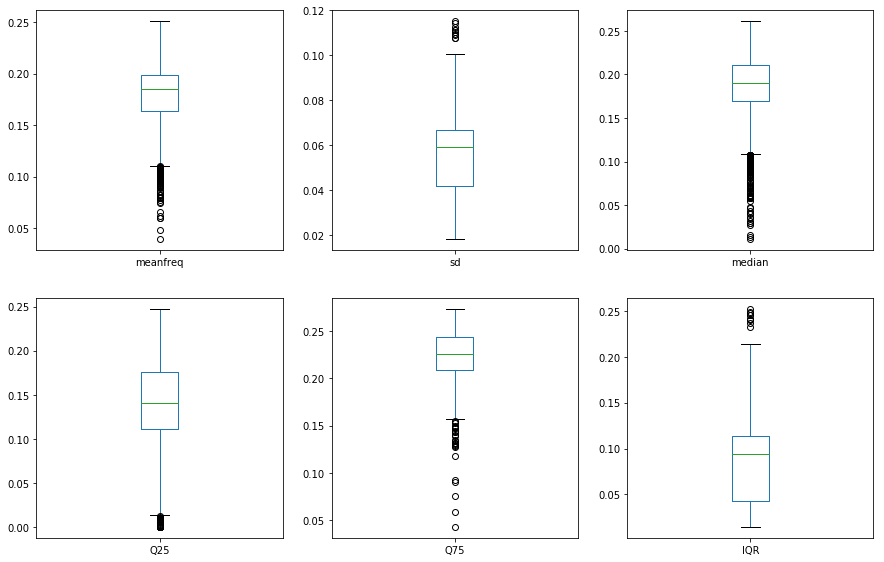

In [79]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

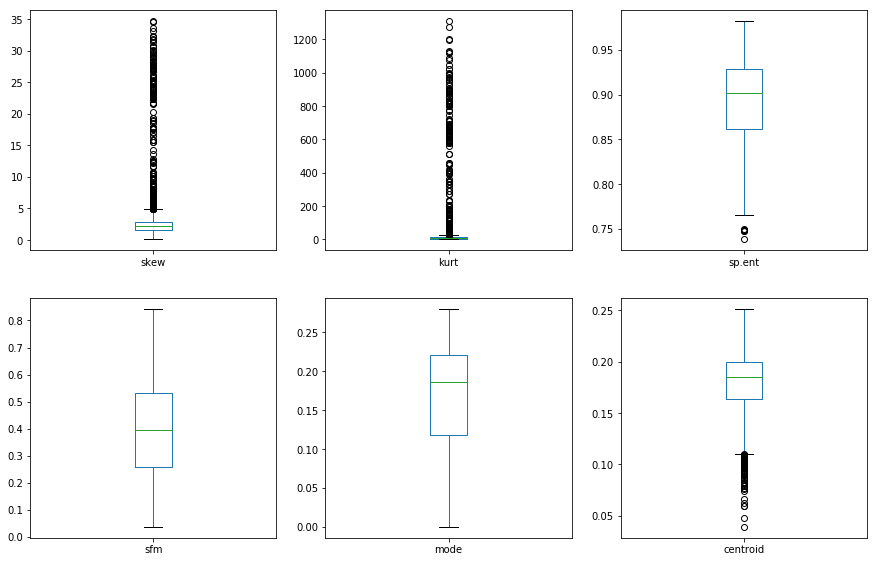

In [80]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6:6 * 2]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

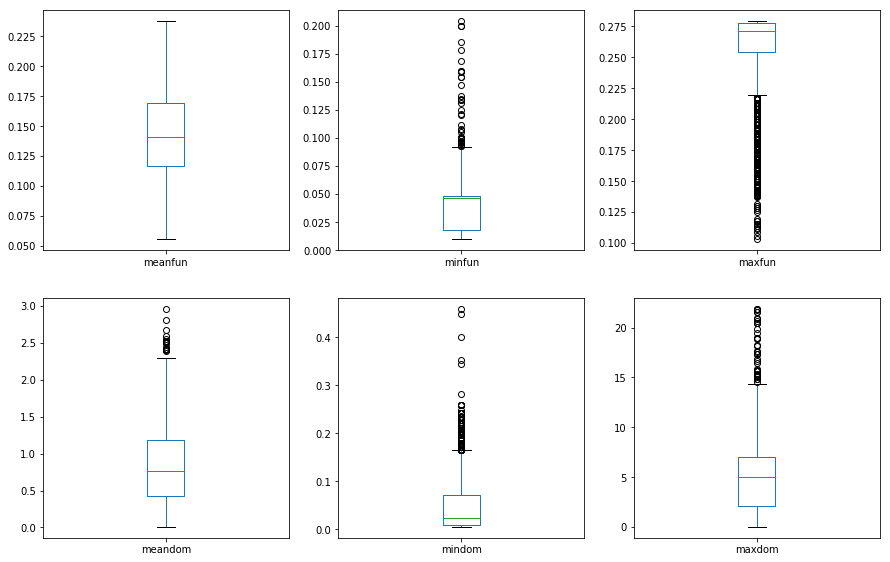

In [81]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6 *2 :6 * 3]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

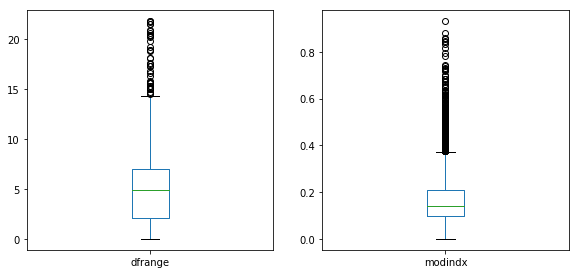

In [82]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6 *3 :6 * 4]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

### Resultado Boxplot, verificamos a incidência de Observação exterior (discrepante ou atípica).
Esses dados serão tratados  utilizando o desvio padrão:
calculando o skewness: skewness = 3(média – mediana) / desvio padrão

In [83]:
# Carrega os dados
url = ".\\baseDados\\voice.csv"
colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url, names=colunas, sep = ",")


# Primeiro caso.

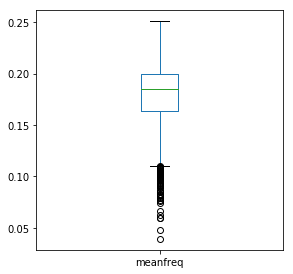

(3168,)

In [84]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[0]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
dataset[colunas[0]].shape

#### Esses dados serão tratados  utilizando o desvio padrão:
calculando o skewness: skewness = 3(média – mediana) / desvio padrão

In [85]:
df_sem_Outliers= dataset[ numpy.abs(dataset[colunas[0]] - dataset[colunas[0]].mean() ) <=  ( 3*dataset[colunas[0]].std()) ]


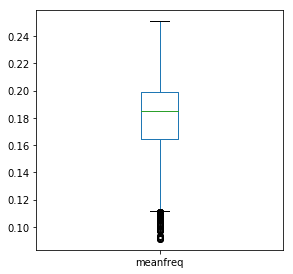

(3145,)

In [86]:
plt.rcParams['figure.figsize'] = (15,15)
df_sem_Outliers[colunas[0]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
df_sem_Outliers[colunas[0]].shape

### Possui ainda muitos ou valores discrepantes vamos o método de interquartil.

Definição da Wikipedia
A gama interquartil ( IQR ), também chamado o midspread ou meio de 50% , ou tecnicamente H-propagação , é uma medida da dispersão estatística, sendo igual à diferença entre os percentis 75 e 25 de, ou entre os quartis superiores e inferiores, IQR = Q 3 - Q 1.
Em outras palavras, o IQR é o primeiro quartil subtraído do terceiro quartil; esses quartis podem ser vistos claramente em um gráfico de caixa nos dados.
É uma medida da dispersão semelhante ao desvio ou variância padrão, mas é muito mais robusta contra valores extremos.

In [87]:


Q1 = dataset[colunas[0]].quantile(0.25)
Q3 = dataset[colunas[0]].quantile(0.75)
IQR = Q3 - Q1




In [88]:
df_sem_Outliersx = dataset[colunas[0]][~((dataset[colunas[0]] < (Q1 - 1.5 * IQR)) | (dataset[colunas[0]]> (Q3 + 1.5 * IQR)))] 
dataset[colunas[0]] = df_sem_Outliersx
dataset.head()


meanfreq     sd  median    Q25    Q75    IQR    skew      kurt  sp.ent    sfm  ...    centroid  \
0       NaN  0.064   0.032  0.015  0.090  0.075  12.863   274.403   0.893  0.492  ...       0.060   
1       NaN  0.067   0.040  0.019  0.093  0.073  22.423   634.614   0.892  0.514  ...       0.066   
2       NaN  0.084   0.037  0.009  0.132  0.123  30.757  1024.928   0.846  0.479  ...       0.077   
3     0.151  0.072   0.158  0.097  0.208  0.111   1.233     4.177   0.963  0.727  ...       0.151   
4     0.135  0.079   0.125  0.079  0.206  0.127   1.101     4.334   0.972  0.784  ...       0.135   

   meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx  label  
0    0.084   0.016   0.276    0.008   0.008   0.008    0.000    0.000   male  
1    0.108   0.016   0.250    0.009   0.008   0.055    0.047    0.053   male  
2    0.099   0.016   0.271    0.008   0.008   0.016    0.008    0.047   male  
3    0.089   0.018   0.250    0.201   0.008   0.562    0.555    0.247   male  
4    0.106   0.017   0.267    0.713   0.008   5.484    5.477    0.208   male  

[5 rows x 21 columns]

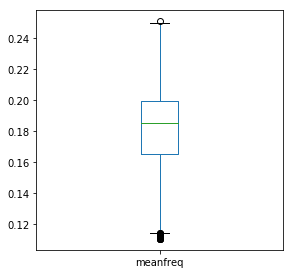

(3104,)

In [89]:
plt.rcParams['figure.figsize'] = (15,15)
df_sem_Outliersx.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()
df_sem_Outliersx.shape

# Resultado melhorou com a técnica interquartil.

#### Fazendo nas todas variaveis por N vezes

In [90]:
dfgrafico_test = dataset
NV=6
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dfgrafico_test[y].quantile(0.25)
        Q3 = dfgrafico_test[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dfgrafico_test[y][~((dfgrafico_test[y] < (Q1 - 1.5 * IQR)) | (dfgrafico_test[y]> (Q3 + 1.5 * IQR)))] 
        dfgrafico_test[y] = df_sem_Outliersx

    
dfgrafico_test = dataset
for z in range(0,NV):
    for y in colunas:
        if y == "label":
            continue
        Q1 = dataset[y].quantile(0.25)
        Q3 = dataset[y].quantile(0.75)
        IQR = Q3 - Q1
        df_sem_Outliersx = dataset[y][~((dataset[y] < (Q1 - 1.5 * IQR)) | (dataset[y]> (Q3 + 1.5 * IQR)))] 
        dataset[y] = df_sem_Outliersx
        dataset=dataset.fillna(dataset.mean())


    
    

# Valores discrepantes Foram removidos da base

In [91]:
dfgrafico_test.head()

meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm  ...    centroid  \
0       NaN  0.064     NaN    NaN    NaN  0.075    NaN    NaN   0.893  0.492  ...         NaN   
1       NaN  0.067     NaN  0.019    NaN  0.073    NaN    NaN   0.892  0.514  ...         NaN   
2       NaN  0.084     NaN    NaN    NaN  0.123    NaN    NaN   0.846  0.479  ...         NaN   
3     0.151  0.072   0.158  0.097  0.208  0.111  1.233  4.177   0.963  0.727  ...       0.151   
4     0.135  0.079   0.125  0.079  0.206  0.127  1.101  4.334   0.972  0.784  ...       0.135   

   meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx  label  
0    0.084   0.016   0.276    0.008   0.008   0.008    0.000    0.000   male  
1    0.108   0.016     NaN    0.009   0.008   0.055    0.047    0.053   male  
2    0.099   0.016   0.271    0.008   0.008   0.016    0.008    0.047   male  
3    0.089   0.018     NaN    0.201   0.008   0.562    0.555    0.247   male  
4    0.106   0.017   0.267    0.713   0.008   5.484    5.477    0.208   male  

[5 rows x 21 columns]

# Analizando o grafio novamente de valorer faltantes antes de aplicar a media

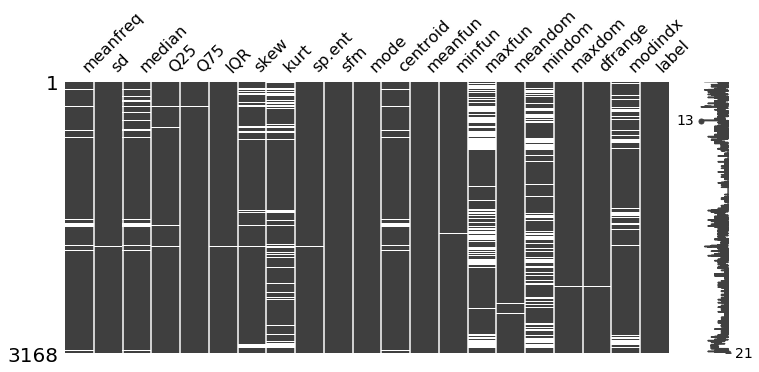

In [92]:
msno.matrix(dfgrafico_test,figsize=(12,5))

In [93]:
dfgrafico_test.isnull().sum()

meanfreq    100
sd           10
median      157
Q25          43
Q75          28
IQR          10
skew        253
kurt        446
sp.ent        6
sfm           0
mode          0
centroid    100
meanfun       0
minfun       38
maxfun      972
meandom      20
mindom      902
maxdom       42
dfrange      42
modindx     411
label         0
dtype: int64

In [94]:
dataset = dataset.dropna()
print(dataset.shape)

(3168, 21)


# Analizando o grafio do dataset aplicado  a media nos valores faltantes.

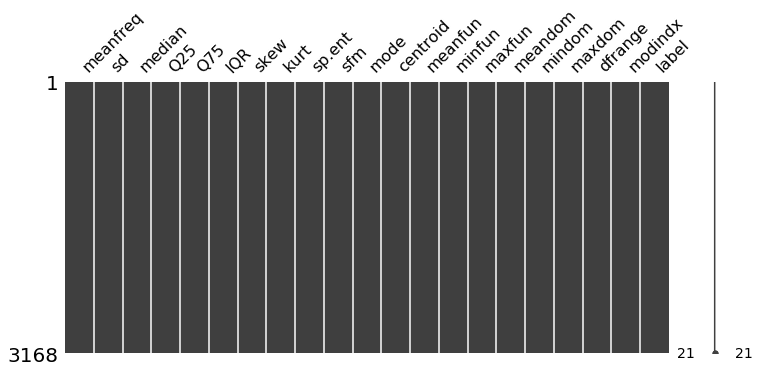

In [95]:
msno.matrix(dataset,figsize=(12,5))

# Recalcular as classe qualitativas

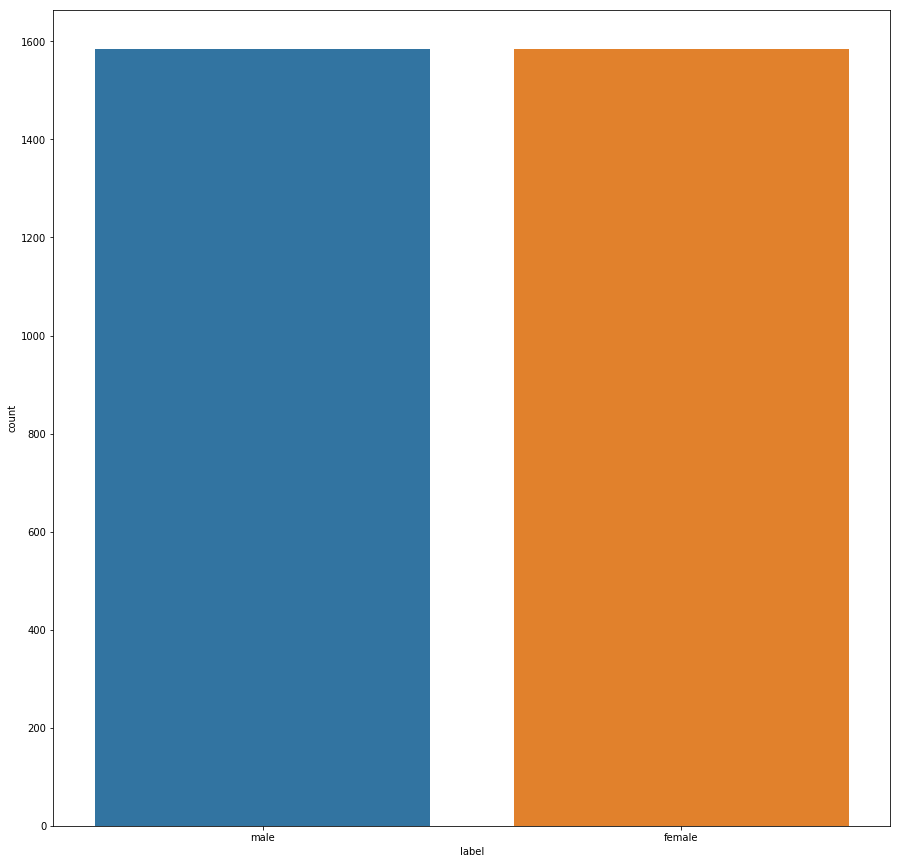

In [96]:
sb.countplot('label',data=dataset)
plt.rcParams['figure.figsize'] = (10,5)
plt.show()

In [97]:
contagem = dataset.groupby('label').size()
print(contagem)

label
female    1584
male      1584
dtype: int64


In [98]:
total=contagem[['female']][0] + contagem[['male']][0]

 #### Calculando a frequência relativa. fr =fi / n ou seja contagem por classe sobre total somada dos valores de cada classe.

In [99]:
freqFRsexodic={}
freqFRsexodic['female']=   contagem[['female']][0] / total
freqFRsexodic['male']=    contagem[['male']][0] / total
freqFRsexodic['Total']=   (  contagem[['female']][0] / total ) + (  contagem[['male']][0] / total)

 #### Calculando a  Frequência relativa percentual da categoria. fri% = fri * 100

In [100]:
freqFRpcsexodic={}
freqFRpcsexodic['female']=   freqFRsexodic['female'] * 100
freqFRpcsexodic['male']=    freqFRsexodic['male']  * 100
freqFRpcsexodic['Total']=  freqFRsexodic['Total']  * 100

In [101]:
freqsexodic={}
freqsexodic['female']=contagem[['female']][0]
freqsexodic['male']=contagem[['male']][0]
freqsexodic['Total']=total

### Montado o drataframe com os resultados.

In [102]:
dffrequenciaSexo = pandas.DataFrame.from_dict(freqsexodic, orient="index").reset_index()
dffrequenciaSexo.columns = ["qualitivas","contagem"]

In [103]:
dffrequenciaSexoFR = pandas.DataFrame.from_dict(freqFRsexodic, orient="index").reset_index()
dffrequenciaSexoFR.columns = ["qualitivas","freqRelativa"]

In [104]:
dffrequenciaSexoFRpc = pandas.DataFrame.from_dict(freqFRpcsexodic, orient="index").reset_index()
dffrequenciaSexoFRpc.columns = ["qualitivas","freqRelativa%"]

In [105]:
dftabelaFreqQualitativas=pandas.merge(dffrequenciaSexo,dffrequenciaSexoFR,how='right',on='qualitivas')
dftabelaFreqQualitativas=pandas.merge(dftabelaFreqQualitativas,dffrequenciaSexoFRpc,how='right',on='qualitivas')

In [106]:
dftabelaFreqQualitativas

qualitivas  contagem  freqRelativa  freqRelativa%
0     female      1584           0.5           50.0
1       male      1584           0.5           50.0
2      Total      3168           1.0          100.0

### Resultado equilbrado entre homens e mulheres.

## Refazendo boxplot.
O BOXPLOT representa os dados através de um retângulo
construído com os quartis e fornece informação sobre valores
extremos. 

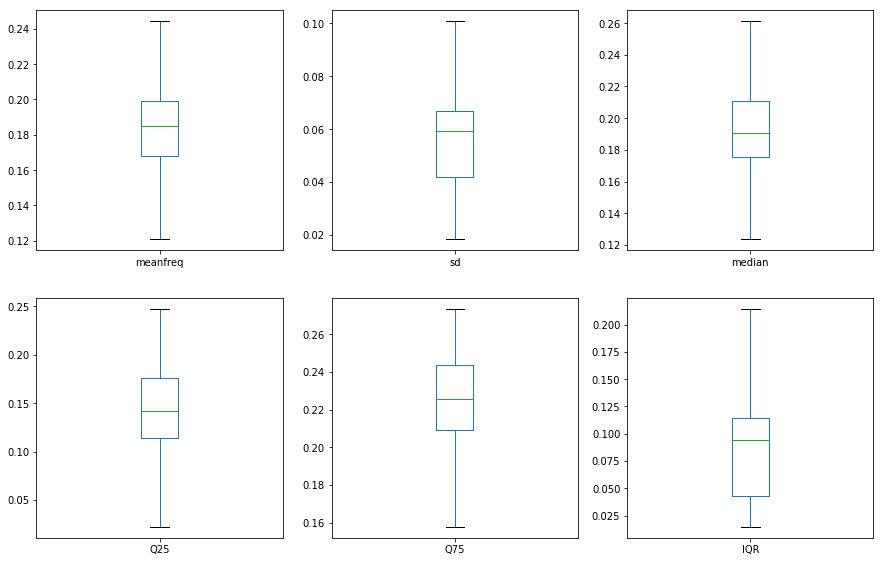

In [107]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[0:6]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

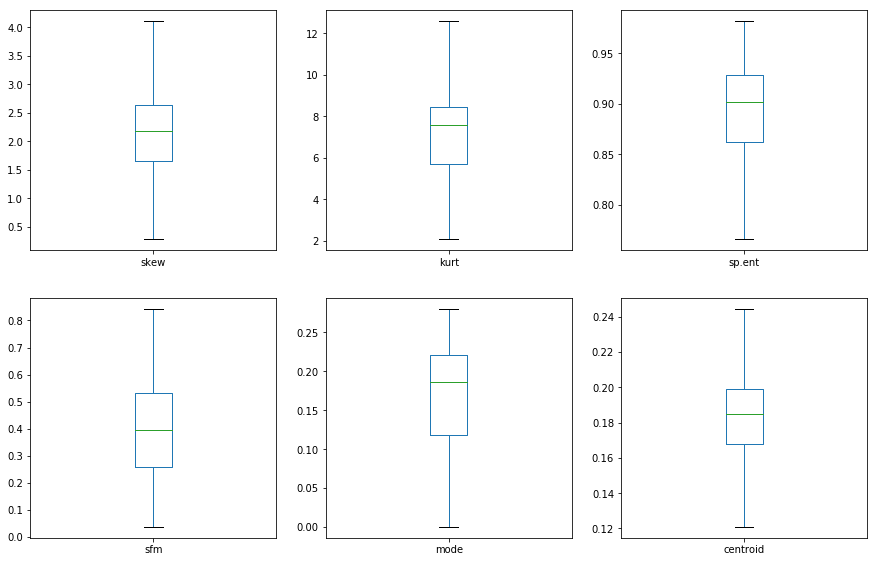

In [108]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6:6 * 2]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

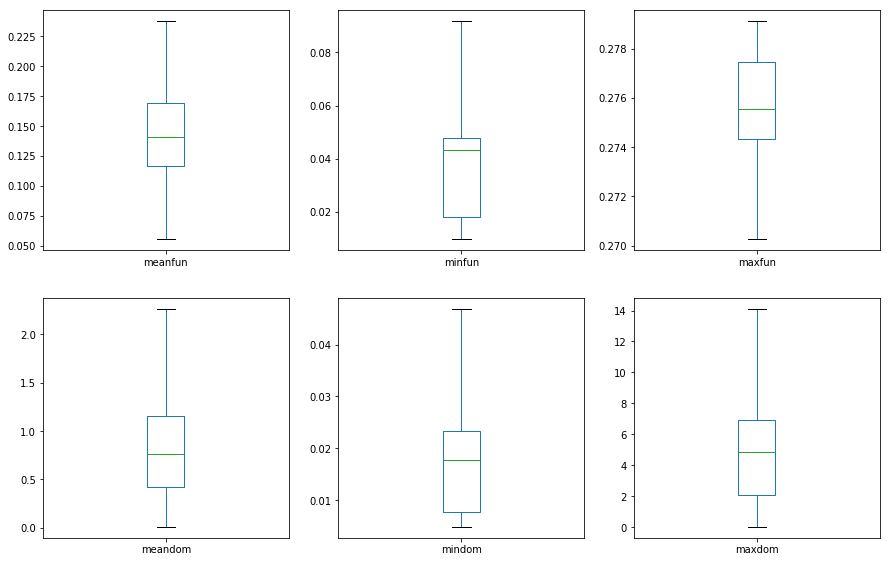

In [109]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6 *2 :6 * 3]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

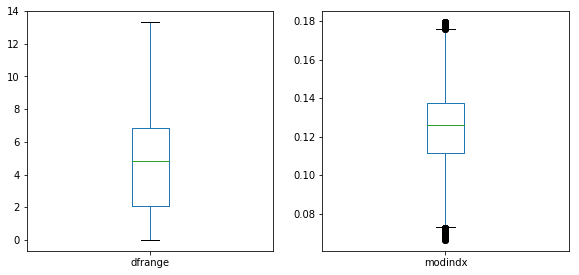

In [110]:
plt.rcParams['figure.figsize'] = (15,15)
dataset[colunas[6 *3 :6 * 4]].plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

## Dataset depois de limpo ainda possui alguns Valores discrepantes.

# Analisando a correlação das variáveis.

In [111]:
# PANDAS: Correlação
cor = dataset.corr(method='pearson')
print(cor)

          meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm   mode  \
meanfreq     1.000 -0.693   0.828  0.806  0.622 -0.575  0.012 -0.036  -0.642 -0.771  0.573   
sd          -0.693  1.000  -0.468 -0.819 -0.143  0.870 -0.227 -0.114   0.766  0.861 -0.516   
median       0.828 -0.468   1.000  0.621  0.598 -0.379 -0.043 -0.060  -0.498 -0.596  0.521   
Q25          0.806 -0.819   0.621  1.000  0.426 -0.856  0.221  0.119  -0.753 -0.805  0.535   
Q75          0.622 -0.143   0.598  0.426  1.000  0.017 -0.254 -0.230  -0.192 -0.386  0.452   
IQR         -0.575  0.870  -0.379 -0.856  0.017  1.000 -0.364 -0.239   0.697  0.689 -0.387   
skew         0.012 -0.227  -0.043  0.221 -0.254 -0.364  1.000  0.694  -0.407 -0.207 -0.153   
kurt        -0.036 -0.114  -0.060  0.119 -0.230 -0.239  0.694  1.000  -0.285 -0.101 -0.175   
sp.ent      -0.642  0.766  -0.498 -0.753 -0.192  0.697 -0.407 -0.285   1.000  0.869 -0.340   
sfm         -0.771  0.861  -0.596 -0.805 -0.386  0.689 -0.20

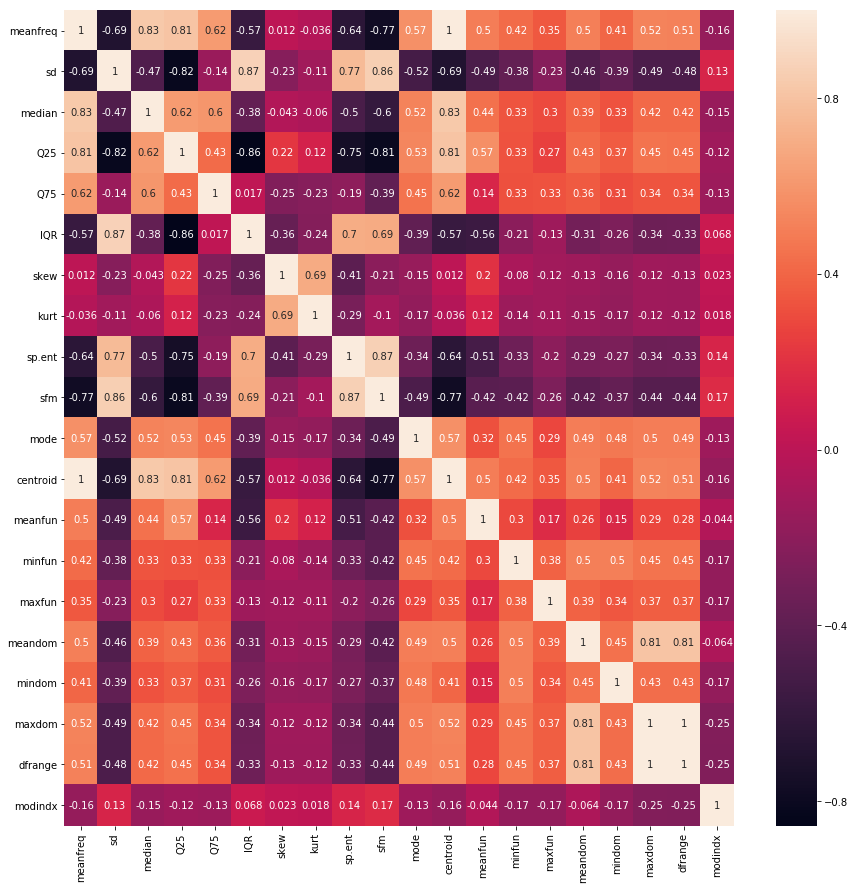

In [112]:
sb.heatmap(cor, annot = True)

### Analisando a correlação das variáveis, visualmente temos 5 grandes áreas  que correlacionam.
## Vamos segmentar a base e var as correlações entre homens e mulheres.

In [113]:
dfHomens = dataset[dataset["label"] == "male"]
dfMuheres = dataset[dataset["label"] == "female"]

In [114]:
###conferindo segmentação homens.

In [115]:
dfHomens.head(2)

meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm  ...    centroid  \
0     0.184  0.064   0.191  0.142  0.226  0.075  2.196  8.442   0.893  0.492  ...       0.184   
1     0.184  0.067   0.191  0.142  0.226  0.073  2.196  8.442   0.892  0.514  ...       0.184   

   meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx  label  
0    0.084   0.016   0.276    0.008   0.008   0.008    0.000    0.134   male  
1    0.108   0.016   0.274    0.009   0.008   0.055    0.047    0.124   male  

[2 rows x 21 columns]

In [116]:
dfHomens.tail(2)

meanfreq    sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm  ...    centroid  \
1582     0.162  0.06   0.140  0.113  0.224  0.112  3.507  8.442   0.907  0.413  ...       0.162   
1583     0.159  0.06   0.147  0.108  0.217  0.109  3.649  8.442   0.898  0.401  ...       0.159   

      meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx  label  
1582    0.110   0.019   0.270    0.421   0.018   0.771    0.684    0.137   male  
1583    0.115   0.079   0.274    0.461   0.018   0.786    0.698    0.137   male  

[2 rows x 21 columns]

In [117]:
###conferindo segmentação mulheres.

In [118]:
dfMuheres.head(2)

meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm   ...    centroid  \
1584     0.158  0.083   0.191  0.062  0.225  0.162  2.801  8.442   0.952  0.679   ...       0.158   
1585     0.183  0.068   0.201  0.175  0.226  0.051  3.002  8.442   0.910  0.506   ...       0.183   

      meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx   label  
1584    0.185   0.023   0.276    0.273   0.047   0.742    0.695    0.137  female  
1585    0.160   0.019   0.276    0.259   0.018   0.805    0.750    0.134  female  

[2 rows x 21 columns]

In [119]:
dfMuheres.tail(2)

meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm   ...    centroid  \
3166     0.144  0.091   0.185  0.044  0.220  0.176  1.591  5.388   0.950  0.675   ...       0.144   
3167     0.166  0.093   0.183  0.070  0.251  0.181  1.705  5.769   0.939  0.602   ...       0.166   

      meanfun  minfun  maxfun  meandom  mindom  maxdom  dfrange  modindx   label  
3166    0.172   0.034   0.274    0.791   0.008   3.594    3.586    0.137  female  
3167    0.186   0.062   0.271    0.227   0.008   0.555    0.547    0.137  female  

[2 rows x 21 columns]

In [120]:
## Correlação por seguimento.

In [121]:
# PANDAS: Correlação
Mcor = dfMuheres.corr(method='pearson')
print(Mcor)

          meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm   mode  \
meanfreq     1.000 -0.669   0.877  0.813  0.714 -0.554  0.031 -0.031  -0.634 -0.762  0.544   
sd          -0.669  1.000  -0.405 -0.778 -0.177  0.843 -0.246 -0.130   0.815  0.918 -0.536   
median       0.877 -0.405   1.000  0.683  0.824 -0.331 -0.049 -0.070  -0.502 -0.581  0.464   
Q25          0.813 -0.778   0.683  1.000  0.513 -0.842  0.261  0.146  -0.759 -0.834  0.541   
Q75          0.714 -0.177   0.824  0.513  1.000 -0.056 -0.233 -0.195  -0.232 -0.373  0.400   
IQR         -0.554  0.843  -0.331 -0.842 -0.056  1.000 -0.422 -0.274   0.713  0.753 -0.433   
skew         0.031 -0.246  -0.049  0.261 -0.233 -0.422  1.000  0.581  -0.383 -0.214 -0.036   
kurt        -0.031 -0.130  -0.070  0.146 -0.195 -0.274  0.581  1.000  -0.240 -0.113 -0.081   
sp.ent      -0.634  0.815  -0.502 -0.759 -0.232  0.713 -0.383 -0.240   1.000  0.895 -0.424   
sfm         -0.762  0.918  -0.581 -0.834 -0.373  0.753 -0.21

In [122]:
# PANDAS: Correlação
Hcor = dfHomens.corr(method='pearson')
print(Hcor)

          meanfreq     sd  median    Q25    Q75    IQR   skew   kurt  sp.ent    sfm   mode  \
meanfreq     1.000 -0.587   0.768  0.722  0.707 -0.321 -0.265 -0.249  -0.458 -0.698  0.593   
sd          -0.587  1.000  -0.435 -0.692 -0.333  0.776  0.141  0.222   0.323  0.737 -0.566   
median       0.768 -0.435   1.000  0.491  0.515 -0.197 -0.213 -0.188  -0.367 -0.534  0.525   
Q25          0.722 -0.692   0.491  1.000  0.696 -0.637 -0.183 -0.224  -0.426 -0.696  0.593   
Q75          0.707 -0.333   0.515  0.696  1.000 -0.070 -0.244 -0.236  -0.363 -0.555  0.555   
IQR         -0.321  0.776  -0.197 -0.637 -0.070  1.000  0.046  0.125   0.134  0.439 -0.356   
skew        -0.265  0.141  -0.213 -0.183 -0.244  0.046  1.000  0.756  -0.250 -0.007 -0.353   
kurt        -0.249  0.222  -0.188 -0.224 -0.236  0.125  0.756  1.000  -0.173  0.079 -0.328   
sp.ent      -0.458  0.323  -0.367 -0.426 -0.363  0.134 -0.250 -0.173   1.000  0.795 -0.176   
sfm         -0.698  0.737  -0.534 -0.696 -0.555  0.439 -0.00

## Homens

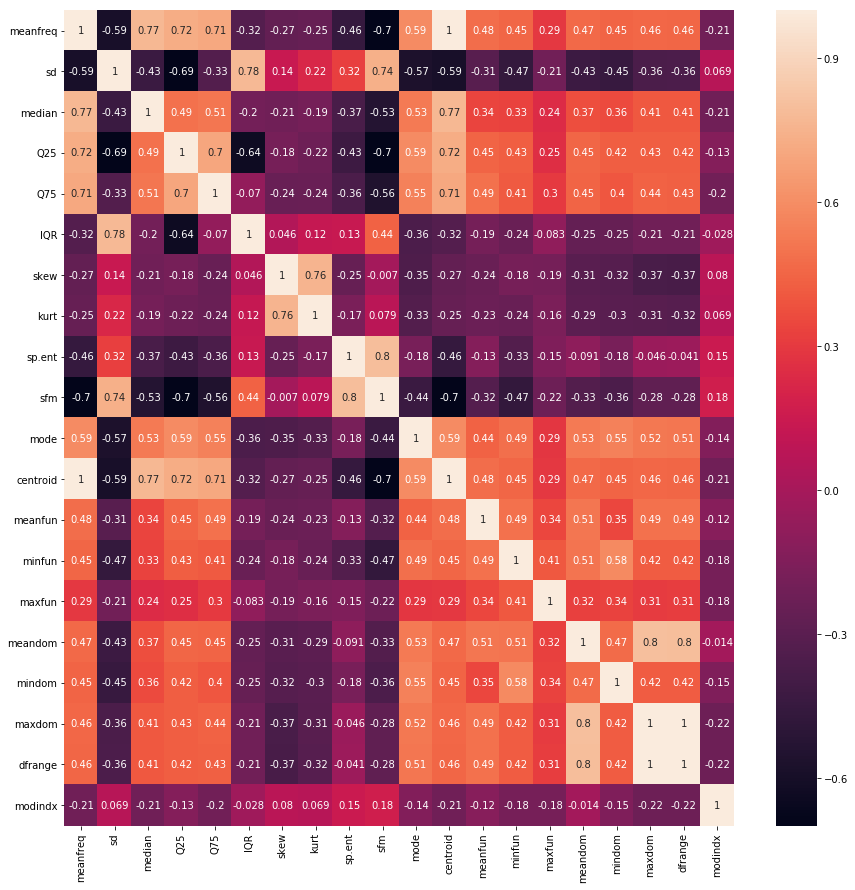

In [123]:
sb.heatmap(Hcor, annot = True)

## Mulheres

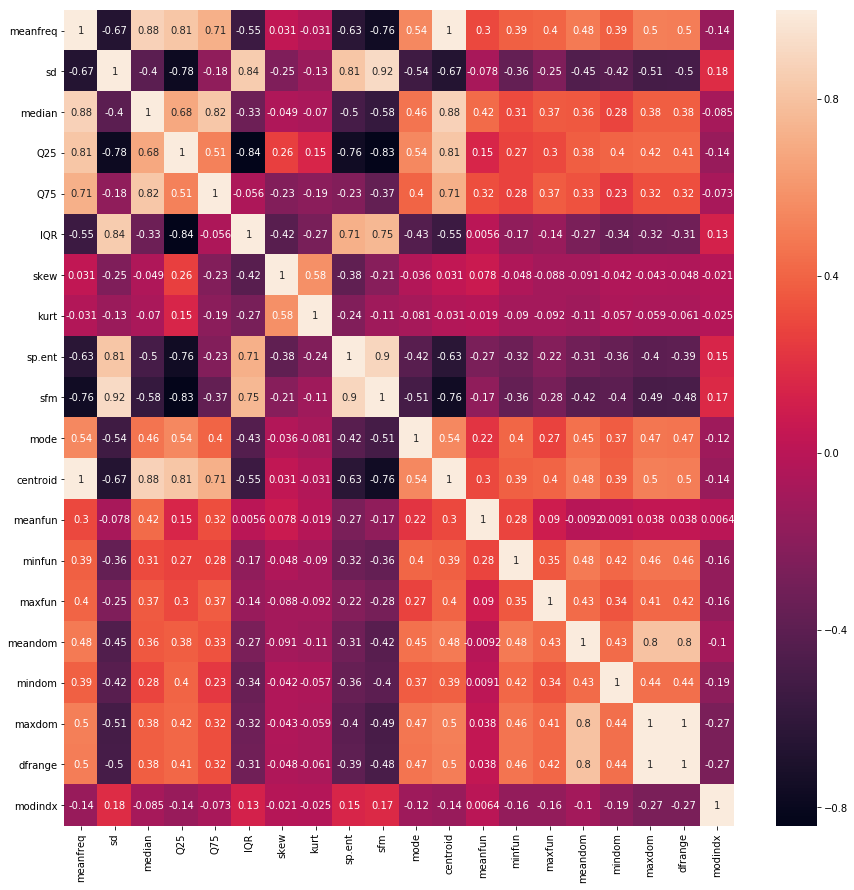

In [124]:
sb.heatmap(Mcor, annot = True)

## Não houve grandes diferenças por seguimento na correlação.

## Finalização, Apos análises deparamos com valores discrepantes, no qual foram substituídos pela média, Os dados representam arquivos de áudio amostrado, o que pode ter sido gravo com auto indexe de ruído e outras interferências, a base limpa está salva, vamos para etapa de treinamento do modelo.

In [125]:
dataset.to_csv(".\\baseDados\\voice_fix.csv")

# Gráfico de dispersão geral e por seguimento.

## Geral dataset  total.

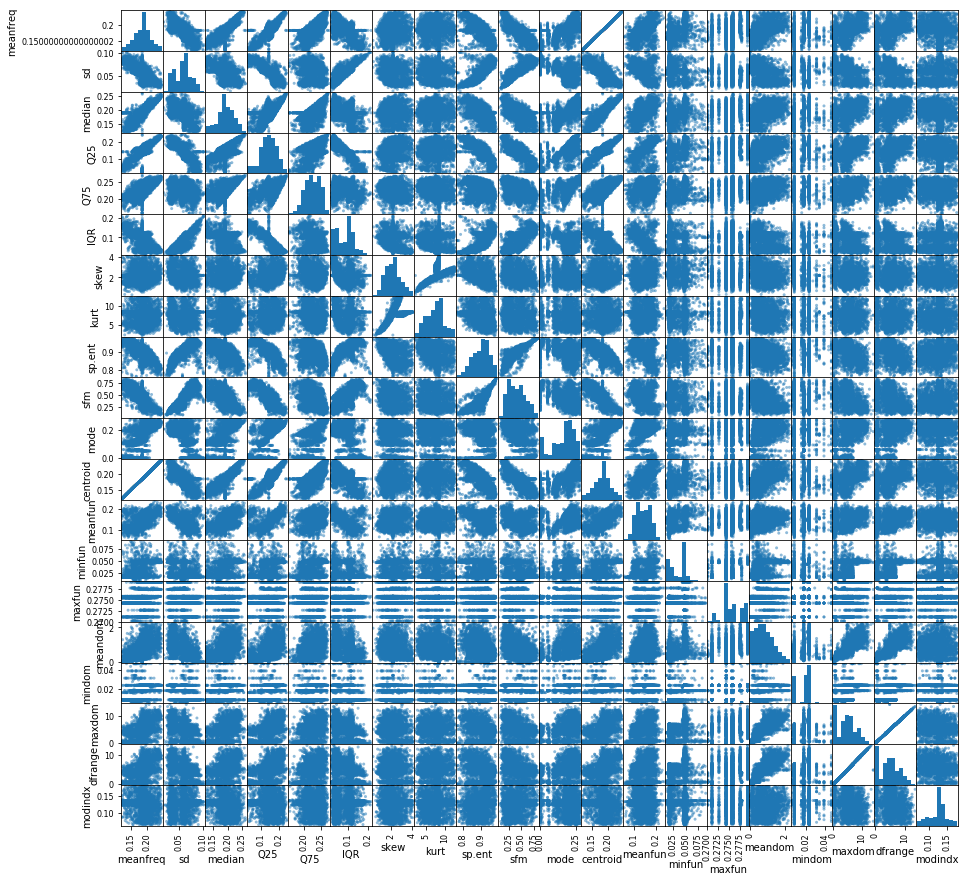

In [126]:
# Gráfico de dispersão (multivariado) 
scatter_matrix(dataset)
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

## Dataset Mulheres

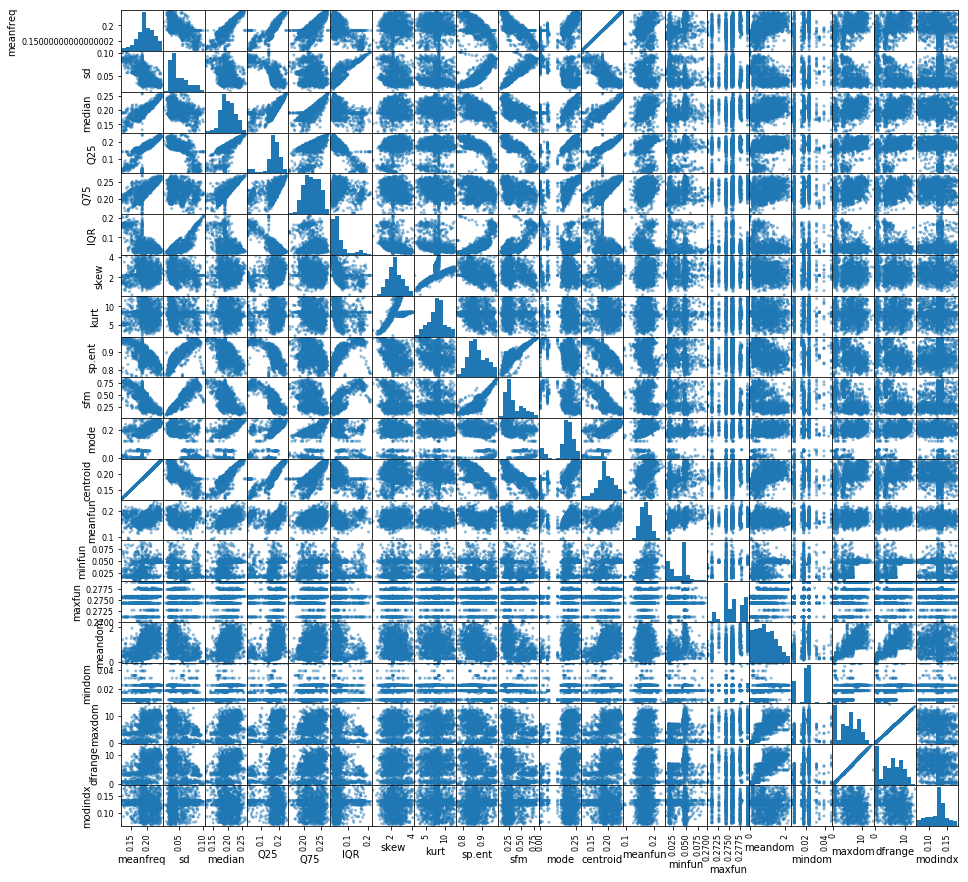

In [127]:
# Gráfico de dispersão (multivariado) 
scatter_matrix(dfMuheres)
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

## Dataset Homens

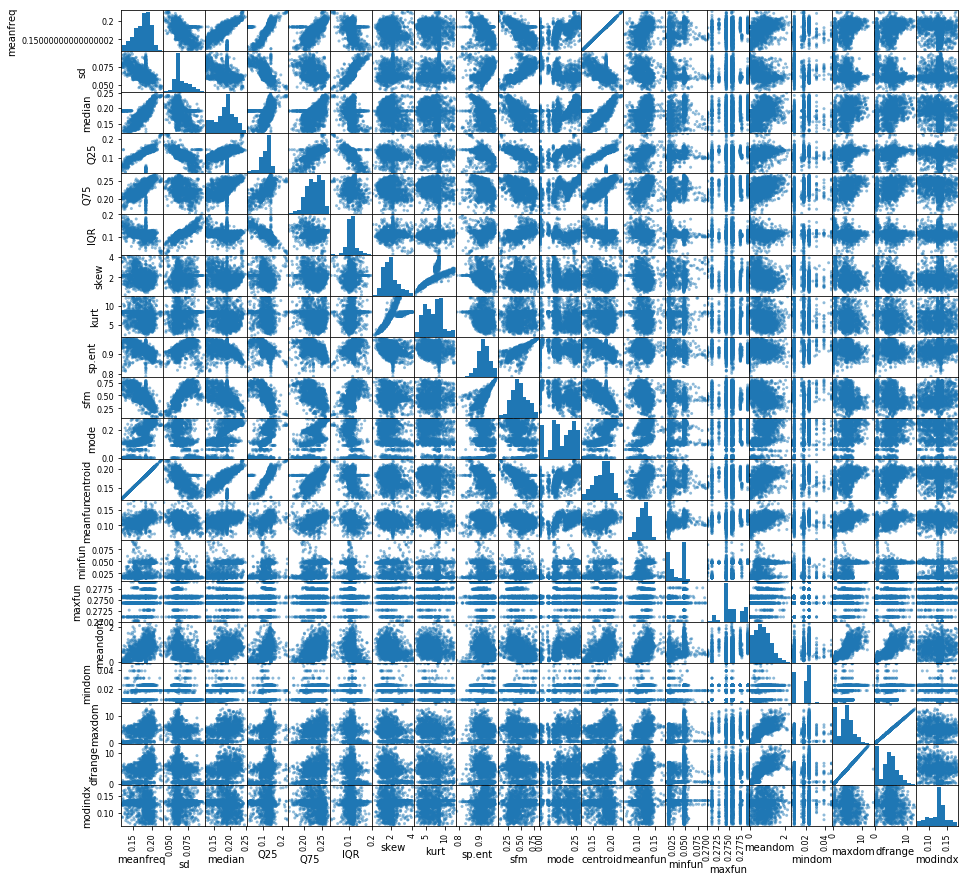

In [128]:
# Gráfico de dispersão (multivariado) 
scatter_matrix(dfHomens)
plt.rcParams['figure.figsize'] = (15,15)
plt.show()

## No gráfico de dispersão podemos encontrar  correlações positivas frequentes entre as variáveis, isso é visto de forma clara  no gráfico de vozes masculinas.

# Comparativo dos dados.

In [2]:
%matplotlib inline

In [23]:
# Importa as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#from pandas.tools.plotting import scatter_matrix
from  pandas.plotting  import scatter_matrix
import seaborn as sb

In [8]:
# Carrega os dados

url = ".\\baseDados\\voice_fix.csv"
#colunas = ["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx","label"]
dataset = pandas.read_csv(url,  sep = ",")

In [9]:
dataset.head()

Unnamed: 0  meanfreq        sd    median       Q25       Q75       IQR  \
0           0  0.183506  0.064241  0.190591  0.142287  0.225624  0.075122   
1           1  0.183506  0.067310  0.190591  0.142482  0.225624  0.073252   
2           2  0.183506  0.083829  0.190591  0.142287  0.225624  0.123207   
3           3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   
4           4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   

       skew      kurt    sp.ent  ...    centroid   meanfun    minfun  \
0  2.196061  8.442361  0.893369  ...    0.183506  0.084279  0.015702   
1  2.196061  8.442361  0.892193  ...    0.183506  0.107937  0.015826   
2  2.196061  8.442361  0.846389  ...    0.183506  0.098706  0.015656   
3  1.232831  4.177296  0.963322  ...    0.151228  0.088965  0.017798   
4  1.101174  4.333713  0.971955  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.133737   male  
1  0.274345  0.009014  0.007812  0.054688  0.046875  0.124252   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.124252   male  
3  0.274345  0.201497  0.007812  0.562500  0.554688  0.129050   male  
4  0.275533  0.712812  0.007812  5.484375  5.476562  0.126195   male  

[5 rows x 22 columns]

In [11]:
dfHomens = dataset[dataset["label"] == "male"]
dfMuheres = dataset[dataset["label"] == "female"]

In [12]:
dfHomens.head()

Unnamed: 0  meanfreq        sd    median       Q25       Q75       IQR  \
0           0  0.183506  0.064241  0.190591  0.142287  0.225624  0.075122   
1           1  0.183506  0.067310  0.190591  0.142482  0.225624  0.073252   
2           2  0.183506  0.083829  0.190591  0.142287  0.225624  0.123207   
3           3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   
4           4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   

       skew      kurt    sp.ent  ...    centroid   meanfun    minfun  \
0  2.196061  8.442361  0.893369  ...    0.183506  0.084279  0.015702   
1  2.196061  8.442361  0.892193  ...    0.183506  0.107937  0.015826   
2  2.196061  8.442361  0.846389  ...    0.183506  0.098706  0.015656   
3  1.232831  4.177296  0.963322  ...    0.151228  0.088965  0.017798   
4  1.101174  4.333713  0.971955  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.133737   male  
1  0.274345  0.009014  0.007812  0.054688  0.046875  0.124252   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.124252   male  
3  0.274345  0.201497  0.007812  0.562500  0.554688  0.129050   male  
4  0.275533  0.712812  0.007812  5.484375  5.476562  0.126195   male  

[5 rows x 22 columns]

In [159]:
dfMuheres.head()

Unnamed: 0  meanfreq        sd    median       Q25       Q75       IQR  \
1584        1584  0.158108  0.082782  0.191191  0.062350  0.224552  0.162202   
1585        1585  0.182855  0.067789  0.200639  0.175489  0.226068  0.050579   
1586        1586  0.199807  0.061974  0.211358  0.184422  0.235687  0.051265   
1587        1587  0.195280  0.072087  0.204656  0.180611  0.255954  0.075344   
1588        1588  0.208504  0.057550  0.220229  0.190343  0.249759  0.059416   

          skew       kurt    sp.ent   ...    centroid   meanfun    minfun  \
1584  2.801344   8.442361  0.952161   ...    0.158108  0.185042  0.023022   
1585  3.001890   8.442361  0.910458   ...    0.182855  0.159590  0.018713   
1586  2.543841   7.587060  0.904432   ...    0.199807  0.156465  0.016194   
1587  2.392326  10.061489  0.907115   ...    0.195280  0.182629  0.024922   
1588  1.707786   5.670912  0.879674   ...    0.208504  0.162043  0.016807   

        maxfun   meandom    mindom    maxdom   dfrange   modindx   label  
1584  0.275862  0.272964  0.046875  0.742188  0.695312  0.137209  female  
1585  0.275533  0.258970  0.017774  0.804688  0.750000  0.133737  female  
1586  0.275533  0.250446  0.017774  0.898438  0.843750  0.137209  female  
1587  0.275862  0.269531  0.017774  0.703125  0.648438  0.137209  female  
1588  0.275533  0.260789  0.017774  0.812500  0.757812  0.129050  female  

[5 rows x 22 columns]

# Gráfico comparativo com valores máximos.

In [207]:
DadosMax = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].max())
    Linha.append(dfMuheres[x].max())
    Linha.append(dfHomens[x].max())
    DadosMax.append(Linha)
    

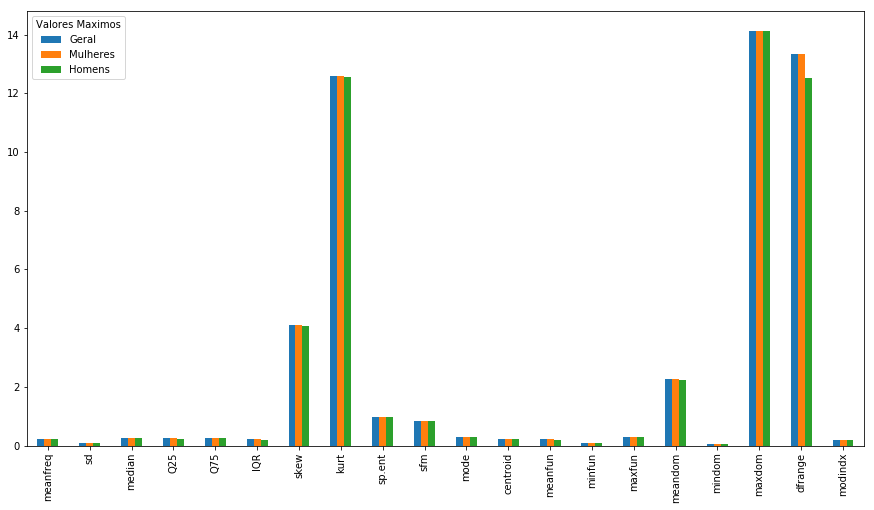

In [208]:
df = pd.DataFrame(DadosMax, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Valores Maximos')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores mínimos.

In [209]:
DadosMin = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].min())
    Linha.append(dfMuheres[x].min())
    Linha.append(dfHomens[x].min())
    DadosMin.append(Linha)
    

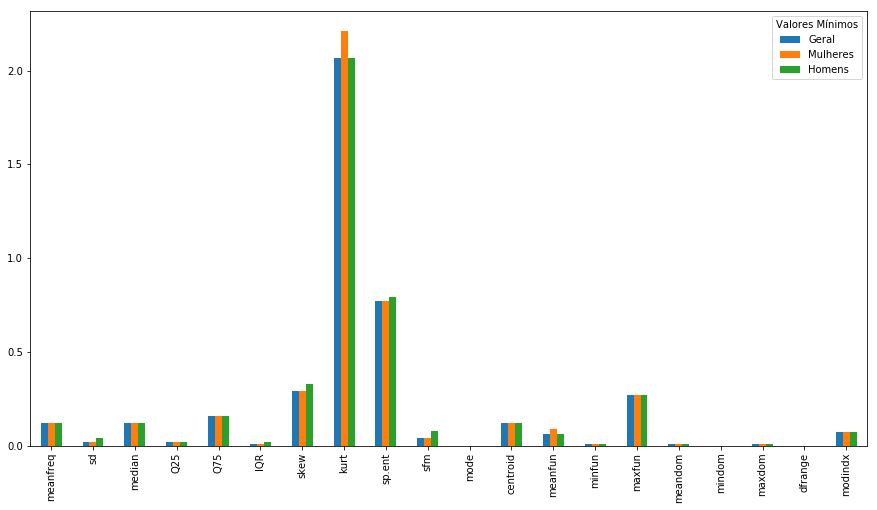

In [210]:
df = pd.DataFrame(DadosMin, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Valores Mínimos')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores média.

In [211]:
DadosMedia = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].mean())
    Linha.append(dfMuheres[x].mean())
    Linha.append(dfHomens[x].mean())
    DadosMedia.append(Linha)

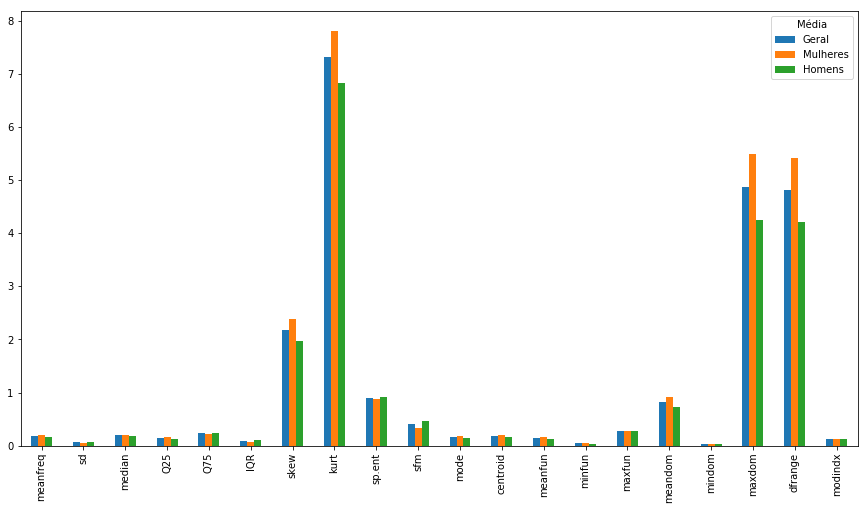

In [212]:
df = pd.DataFrame(DadosMedia, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Média')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores mediana.

In [213]:
DadosMediana = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].quantile(q=0.50))
    Linha.append(dfMuheres[x].quantile(q=0.50))
    Linha.append(dfHomens[x].quantile(q=0.50))
    DadosMediana.append(Linha)

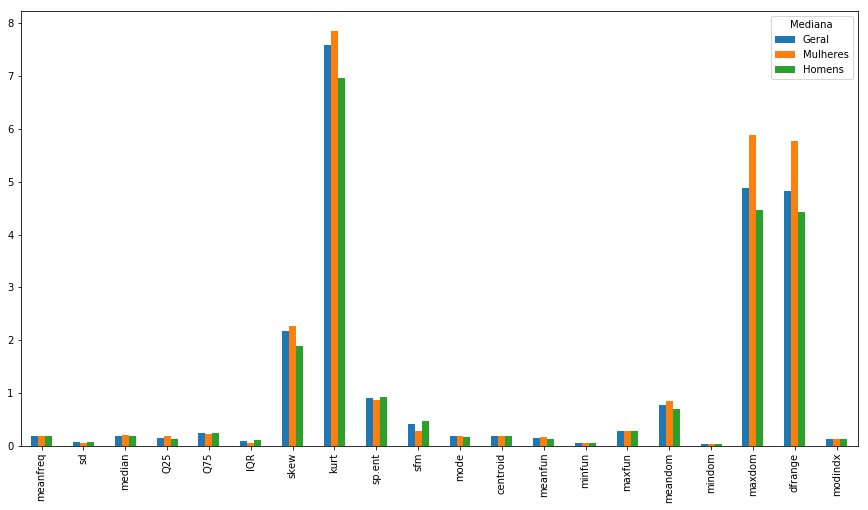

In [214]:
df = pd.DataFrame(DadosMediana, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Mediana')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores Desvio padrão.


In [215]:
Dadosdp = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].std())
    Linha.append(dfMuheres[x].std())
    Linha.append(dfHomens[x].std())
    Dadosdp.append(Linha)

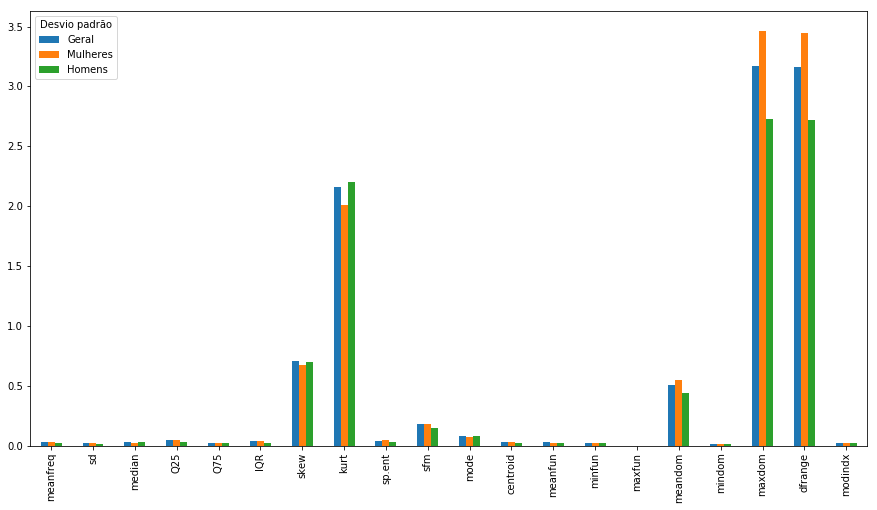

In [216]:
df = pd.DataFrame(Dadosdp, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Desvio padrão')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores Variância.

In [217]:
Dadosvr = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].var())
    Linha.append(dfMuheres[x].var())
    Linha.append(dfHomens[x].var())
    Dadosvr.append(Linha)

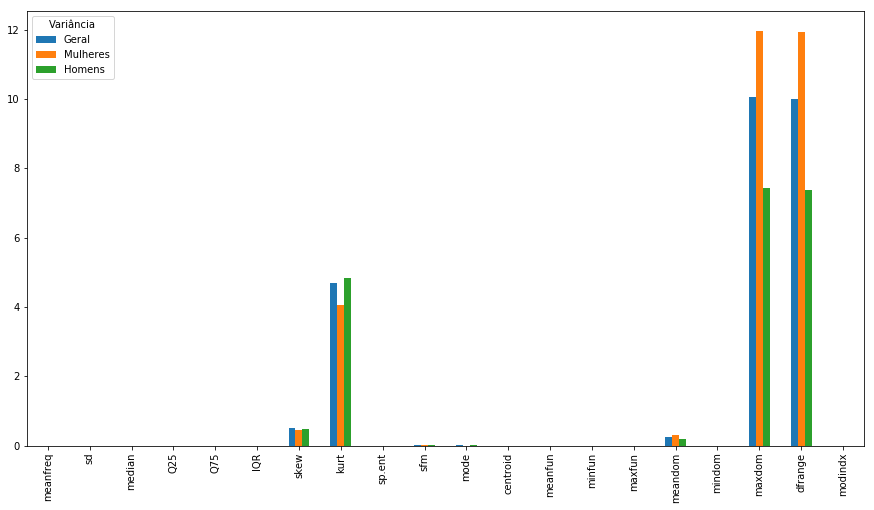

In [204]:
df = pd.DataFrame(Dadosvr, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Variância')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores Amplitude.

In [225]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    
    G=dataset[x].max() - dataset[x].min()
    M=dfMuheres[x].max() - dfMuheres[x].min()
    H=dfHomens[x].max() - dfHomens[x].min()
    
    
    Linha.append(G)
    Linha.append(M)
    Linha.append(H)
    Dados.append(Linha)

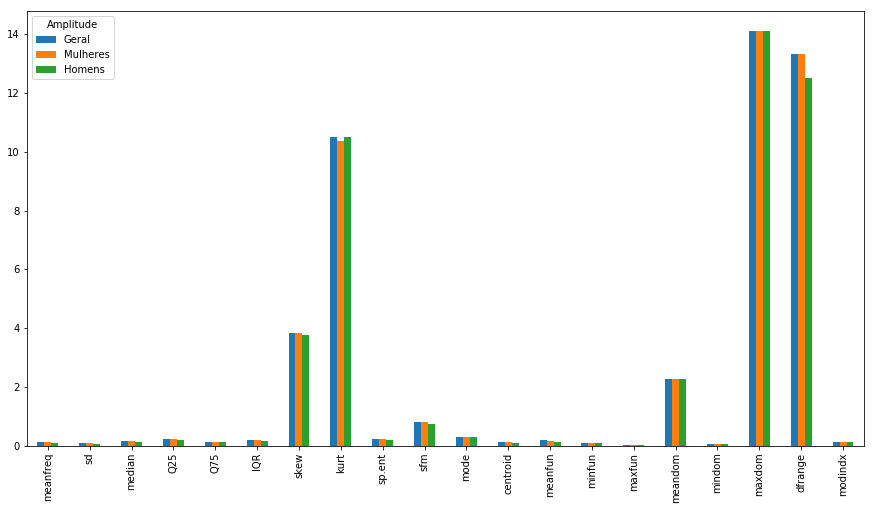

In [226]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Amplitude')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores Moda.

In [231]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append(dataset[x].mode()[0])
    Linha.append(dfMuheres[x].mode()[0])
    Linha.append(dfHomens[x].mode()[0])
    Dados.append(Linha)

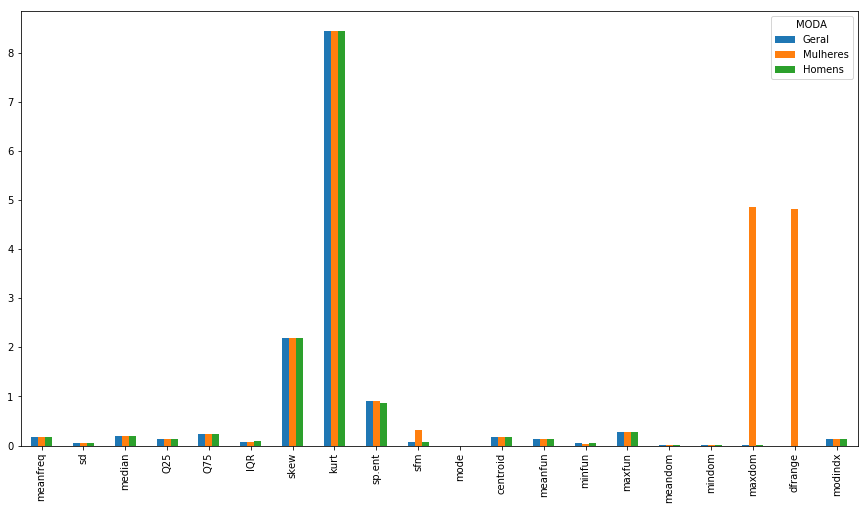

In [232]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='MODA')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Gráfico comparativo com valores Coeficiente de variação.

In [235]:
Dados = []
for x in colunas:
    if x == "label":
        continue
    Linha =[]
    Linha.append((dataset[x].std()/dataset[x].mean()) *  100)
    Linha.append((dfMuheres[x].std()/dfMuheres[x].mean()) *  100)
    Linha.append((dfHomens[x].std()/dfHomens[x].mean()) *  100)
    Dados.append(Linha)
    
    


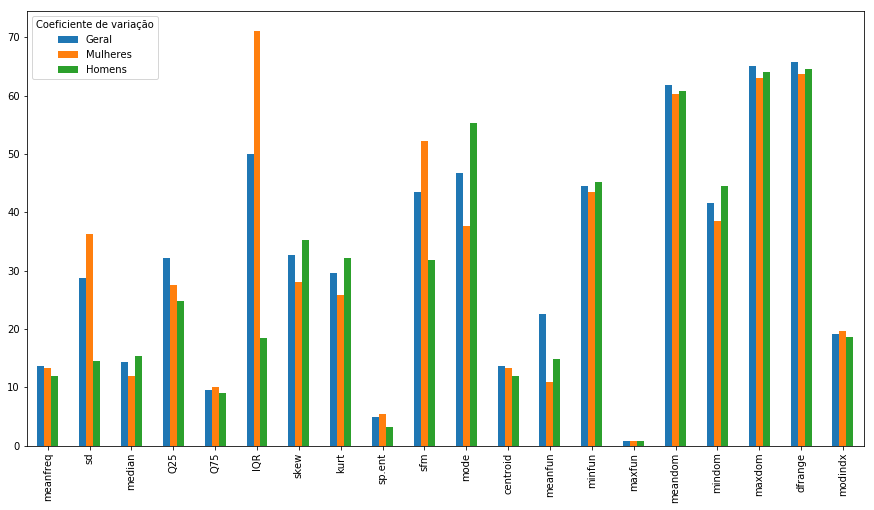

In [236]:
df = pd.DataFrame(Dados, 
                  index=["meanfreq","sd","median","Q25","Q75","IQR","skew","kurt","sp.ent","sfm","mode","centroid","meanfun","minfun","maxfun","meandom","mindom","maxdom","dfrange","modindx"],
                  columns=pd.Index(['Geral', 'Mulheres', 'Homens'], 
                 name='Coeficiente de variação')).round(2)


df.plot(kind='bar',figsize=(15,8))

# Fim da análise exploraria.